In [ ]:
# Today, AI is everywhere, we are able to do many things with it.
# I will be exploring one of the key areas within AI, classification, which is a field currently under research, and we have not fully yet found out the limitations
# We've trained AI which can classify animals, plants, cars, and medicine, among other things.
# However, the main problem in hand revolves around the AI's capability to effectively classify manipulated images and the extent of training required to enable the AI to reliably detect these altered images.
# This is where the AI is most vulnerable as it is not able to adapt quickly to evolving image manipulation techniques and this is what I will be aiming to research and come to a solution where I aim to see how easily I can manipulate the AI into classifying the hacked images.


In [ ]:

dataset_url = '/content/sample_data/datasets/archive.zip'

In [ ]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
classes = os.listdir(dataset_path)
images = []
labels = []
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        images.append(image_path)
        labels.append(class_name)
train_images, test_images, train_labels, test_labels = train_test_split(
    images,
    labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

val_images, test_images, val_labels, test_labels = train_test_split(
    test_images,
    test_labels,
    test_size=0.5,
    random_state=42
)
print(f"Number of training examples: {len(train_images)}")
print(f"Number of validation examples: {len(val_images)}")
print(f"Number of test examples: {len(test_images)}")



Number of training examples: 2476
Number of validation examples: 310
Number of test examples: 310


Found 3096 files belonging to 4 classes.
Using 2477 files for training.


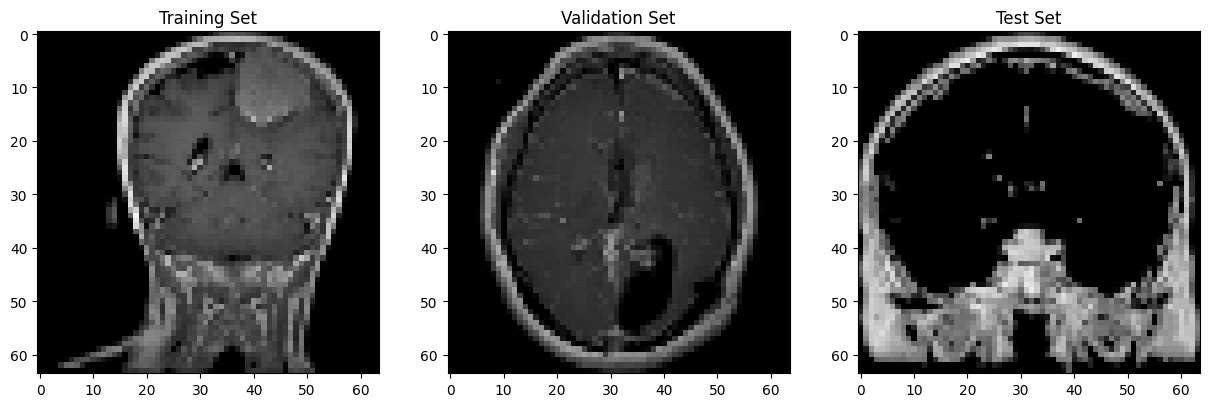

In [ ]:
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/archive (1).zip'
extracted_dir = '/content/drive/MyDrive/Colab Notebooks'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
dataset_path = os.path.join(extracted_dir, 'Data')
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    image_size=(64, 64),
    batch_size=32,
    label_mode='categorical',
    validation_split=0.2,
    subset='training',
    seed=42
)
num_images = len(full_dataset)
num_train = int(0.6 * num_images)
num_val = int(0.2 * num_images)
num_test = num_images - num_train - num_val
train_dataset = full_dataset.take(num_train)
remaining_dataset = full_dataset.skip(num_train)
val_dataset = remaining_dataset.take(num_val)
test_dataset = remaining_dataset.skip(num_val)
plt.figure(figsize=(15, 5))
for images, labels in train_dataset.take(1):
    plt.subplot(1, 3, 1)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title("Training Set")
for images, labels in val_dataset.take(1):
    plt.subplot(1, 3, 2)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title("Validation Set")
for images, labels in test_dataset.take(1):
    plt.subplot(1, 3, 3)
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title("Test Set")
plt.show()

#Here I have split the dataset into 3 sections to ensure we are ready for training it, which has training set, validation and test set.

In [ ]:
import os

dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
total_images = 0
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            total_images += 1
print("Total number of images in the dataset:", total_images)


Total number of images in the dataset: 3096


In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
train_ds = dataset['train']
img_height, img_width = 360, 360
batch_size = 32
train_ds = train_ds.map(lambda image, label: (tf.image.resize(image, (img_height, img_width)), label))
train_ds = train_ds.shuffle(buffer_size=1000, seed=123)
train_ds = train_ds.batch(batch_size)


In [4]:
import os
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
class_names = sorted([dir for dir in os.listdir(dataset_path) if not dir.startswith('.')])
print(class_names)
import os
# Here we are printing the class names , for tumor dataset, there should be only 4 classes

['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_dataset = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
num_classes = len(train_dataset.class_indices)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
class TrainingAccuracyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}/{self.params['epochs']} - Training Accuracy: {logs['accuracy']:.4f}")
accuracy_callback = TrainingAccuracyCallback()
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=[accuracy_callback])
final_training_accuracy = history.history['accuracy'][-1]
print("Training accuracy:", final_training_accuracy)

#Here is my first attempt to see how much training accuracy we are getting after training the model to ensure that it is ready for training

Found 3096 images belonging to 5 classes.
Found 0 images belonging to 5 classes.
Epoch 1/10
97/97 [==============================] - 69s 647ms/step - loss: 1.2921 - accuracy: 0.3989
Epoch 2/10
97/97 [==============================] - 71s 726ms/step - loss: 0.9493 - accuracy: 0.6014
Epoch 3/10
97/97 [==============================] - 68s 696ms/step - loss: 0.8051 - accuracy: 0.6757
Epoch 4/10
97/97 [==============================] - 66s 676ms/step - loss: 0.6534 - accuracy: 0.7348
Epoch 5/10
97/97 [==============================] - 62s 633ms/step - loss: 0.6095 - accuracy: 0.7558
Epoch 6/10
97/97 [==============================] - 67s 689ms/step - loss: 0.5359 - accuracy: 0.7946
Epoch 7/10
97/97 [==============================] - 64s 665ms/step - loss: 0.5029 - accuracy: 0.8081
Epoch 8/10
97/97 [==============================] - 68s 702ms/step - loss: 0.4376 - accuracy: 0.8249
Epoch 9/10
97/97 [==============================] - 66s 685ms/step - loss: 0.3933 - accuracy: 0.8408
Epoch 10/1

Found 3096 files belonging to 4 classes.
Using 619 files for validation.
1/1 [==============================] - 0s 350ms/step


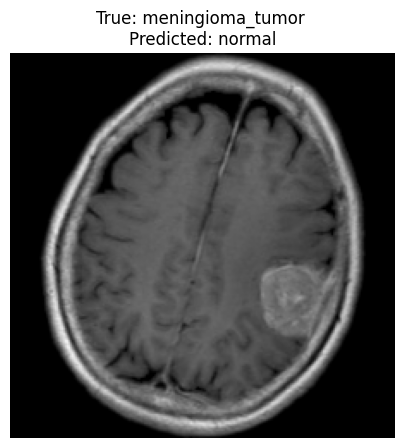

1/1 [==============================] - 0s 24ms/step


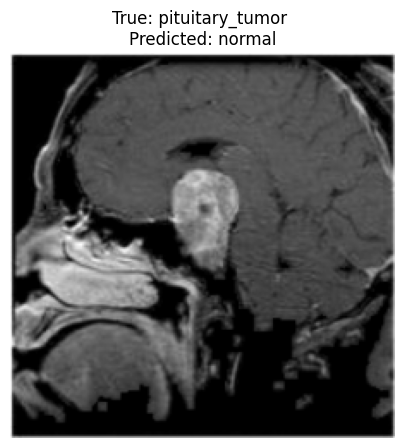

1/1 [==============================] - 0s 18ms/step


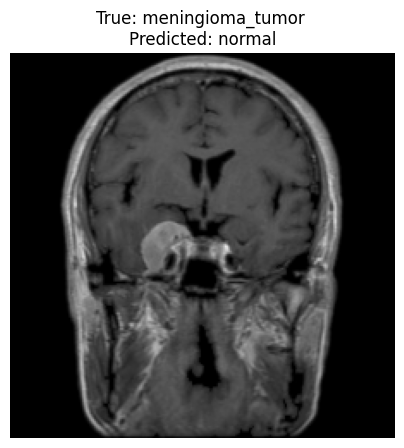

1/1 [==============================] - 0s 28ms/step


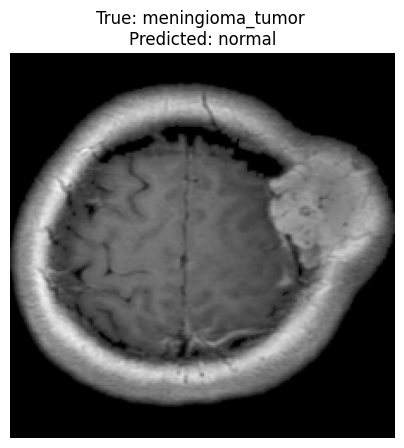

1/1 [==============================] - 0s 31ms/step


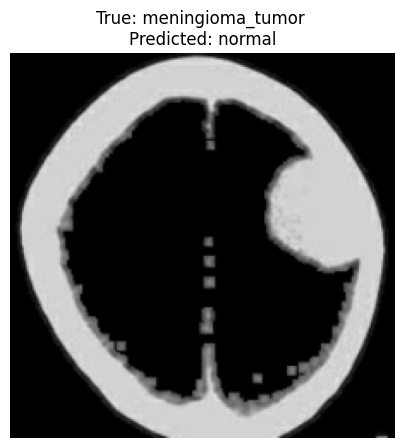

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(224, 224),
    batch_size=1,
    label_mode='categorical'
)
class_names = test_dataset.class_names
num_images = 5
for i, (image, label) in enumerate(test_dataset.take(num_images)):
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)

    plt.figure(figsize=(5, 5))
    plt.imshow(image[0].numpy().astype(np.uint8))
    plt.title(f"True: {class_names[np.argmax(label[0])]} \nPredicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()

    #Here I am just showing the 5 images and the predicted labels after training it. as you can see it is quite off and not predicting correctly.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense_2 (Dense)             (None, 512)               655872    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 2916421 (11.13 MB)
Trainable params: 2882309 (11.00 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________
Epoch 1/20
78/78 [==============================] - 73s 571ms/step - loss: 0

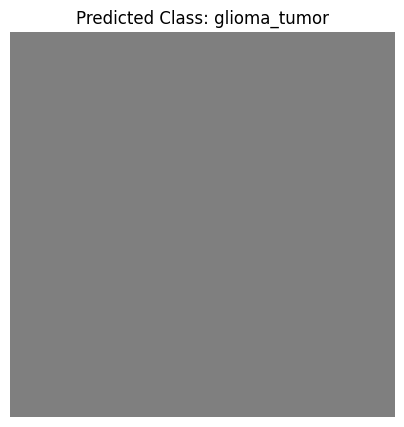

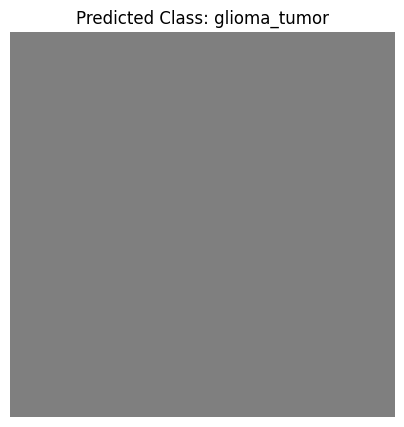

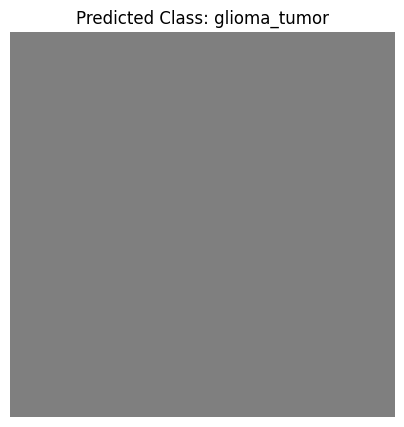

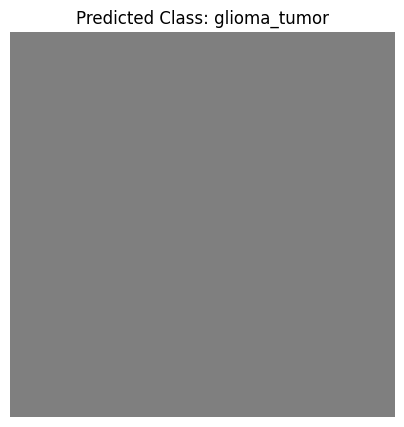

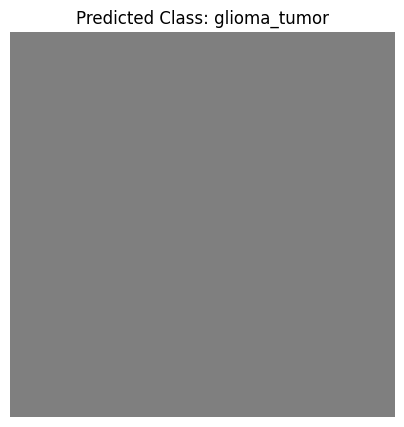

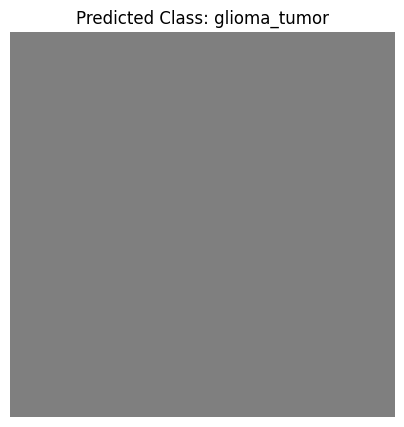

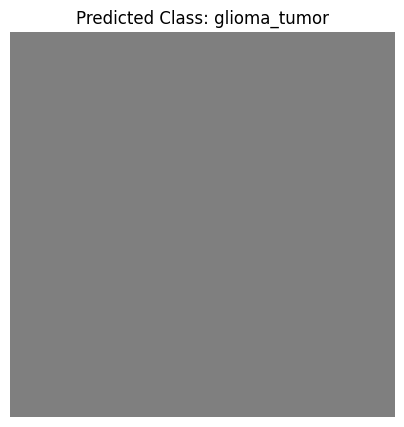

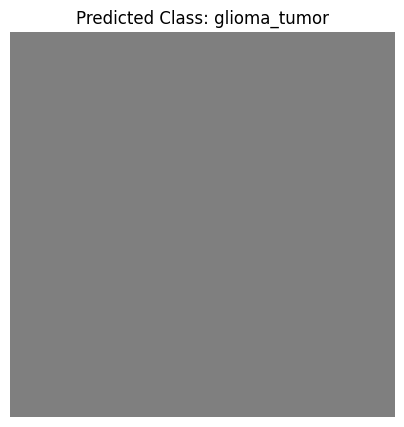

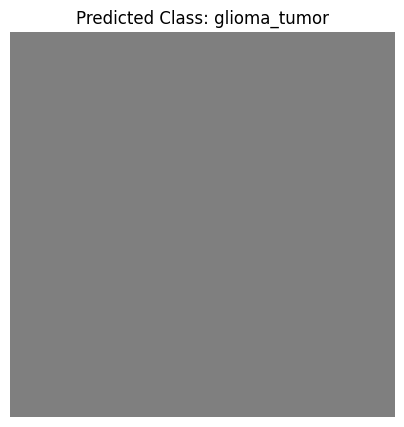

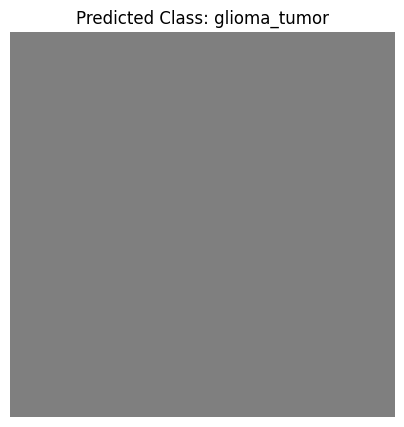

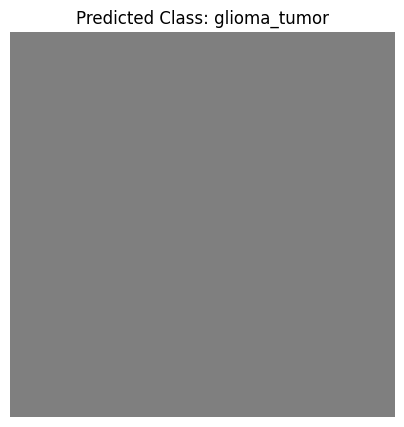

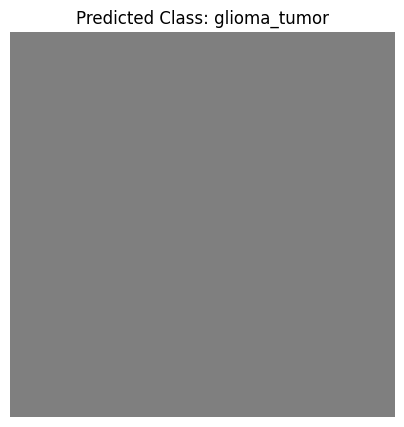

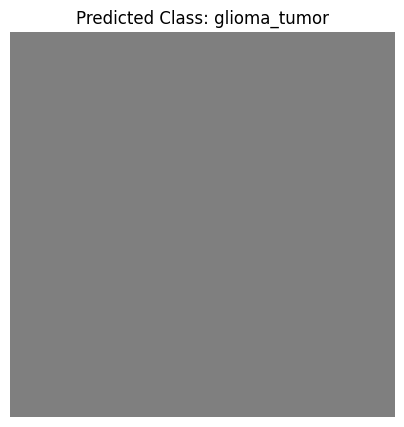

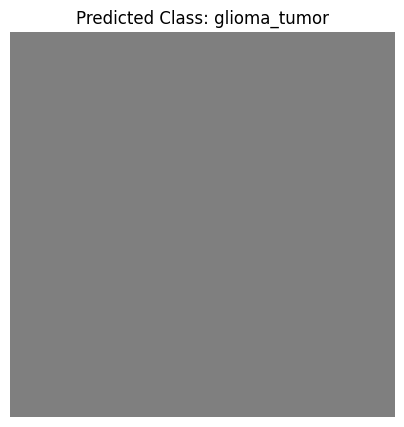

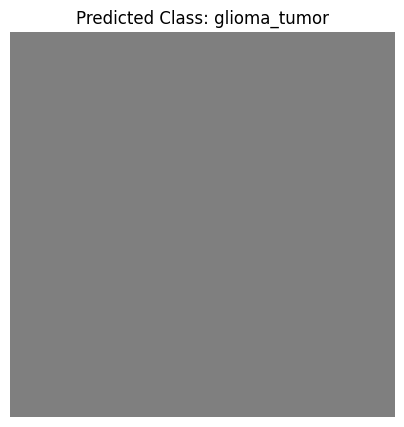

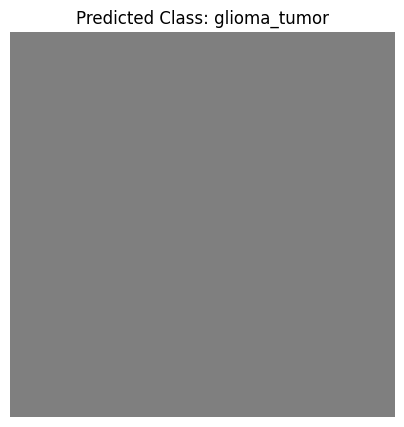

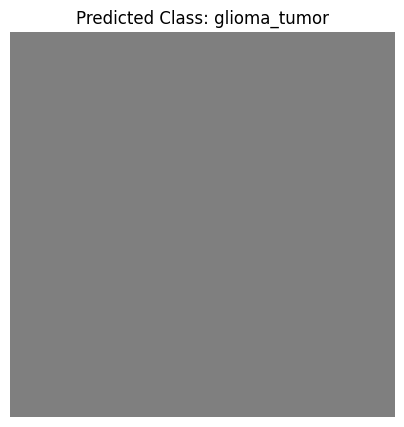

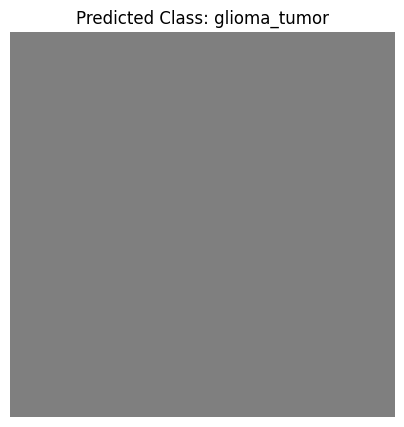

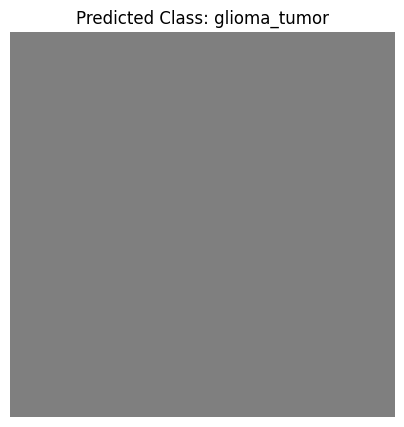

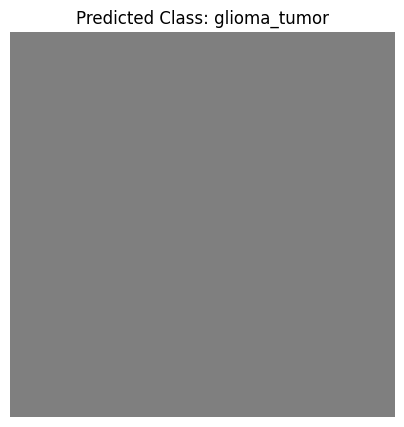

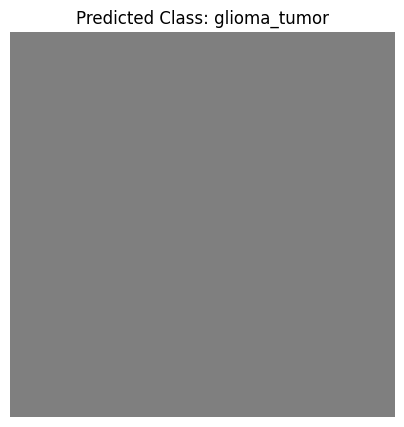

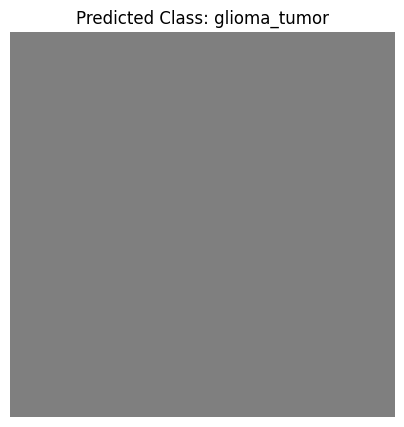

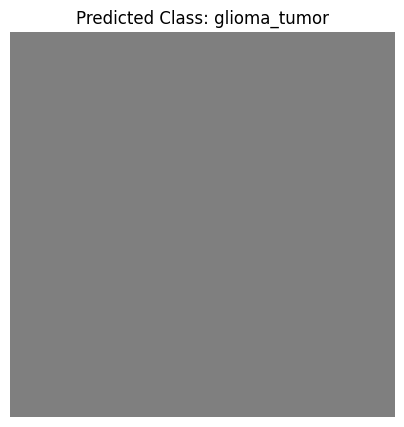

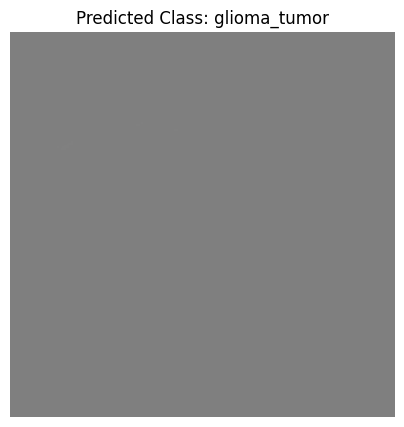

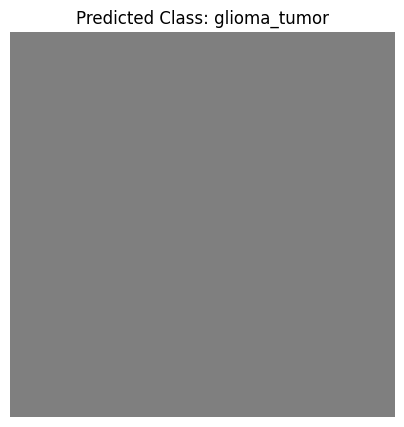

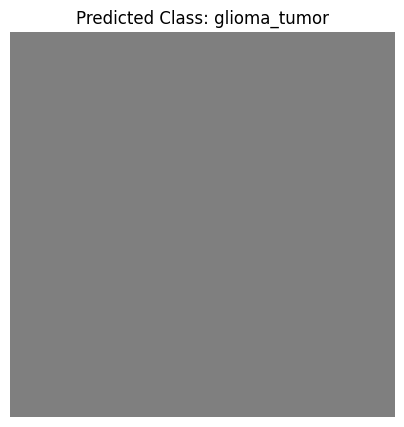

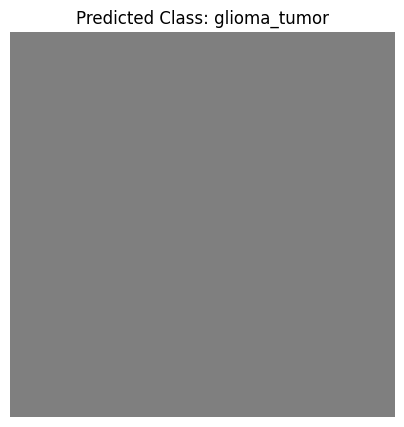

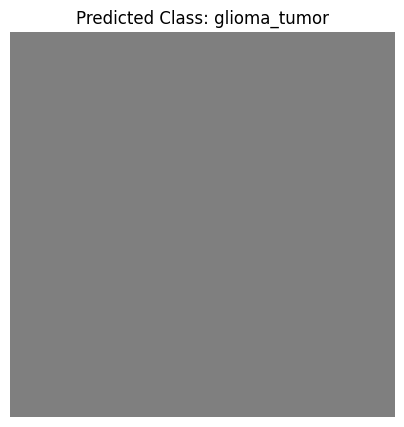

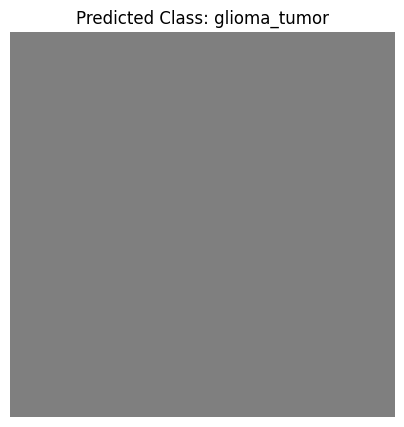

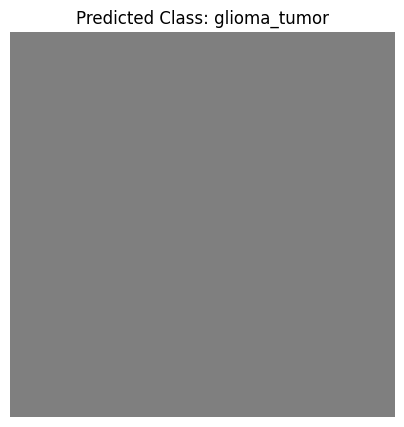

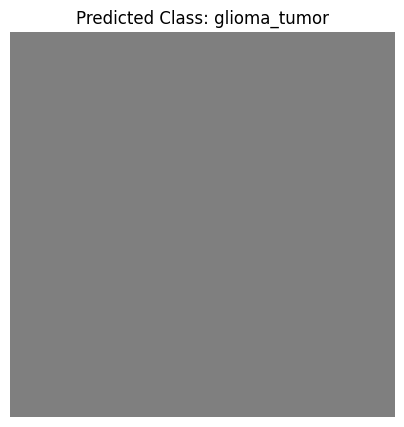

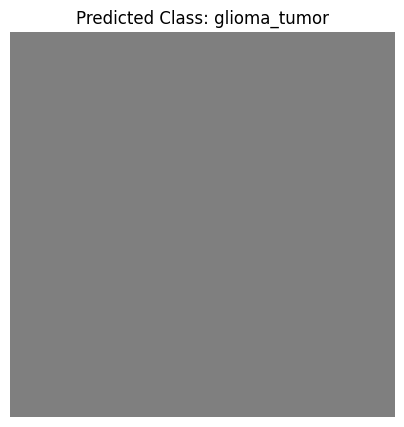

1/1 [==============================] - 0s 43ms/step


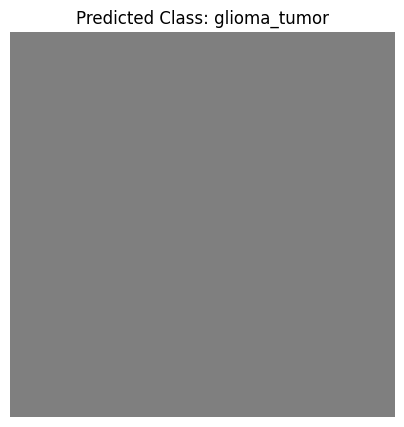

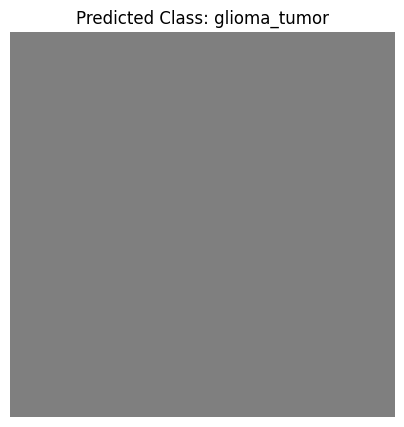

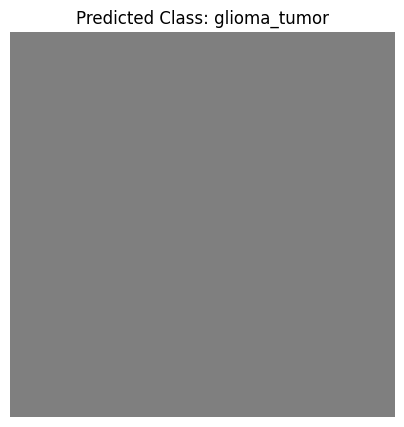

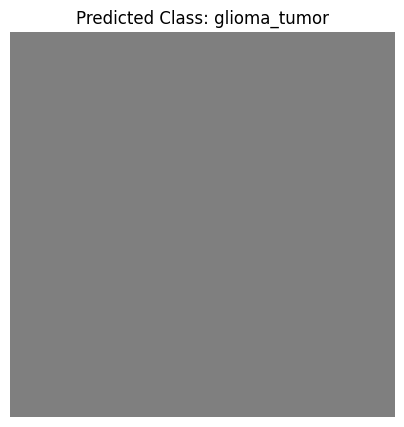

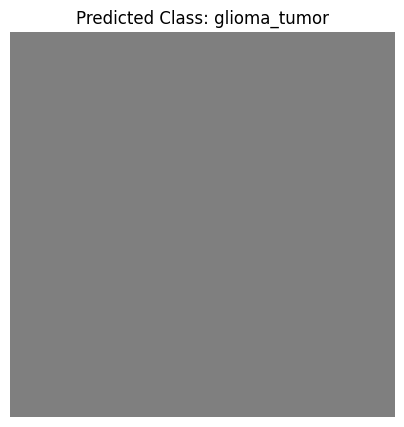

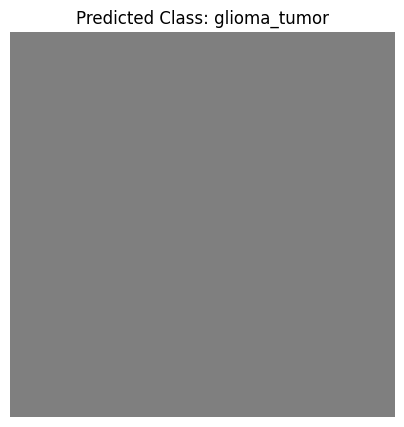

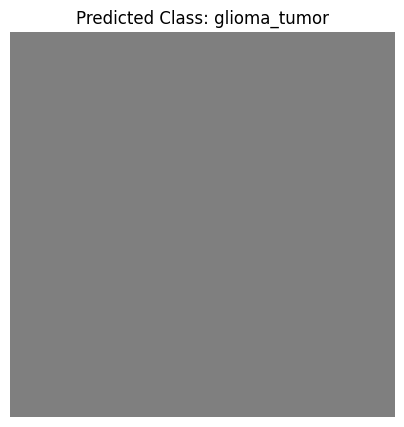

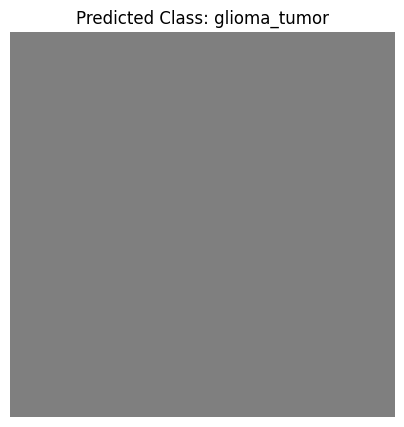

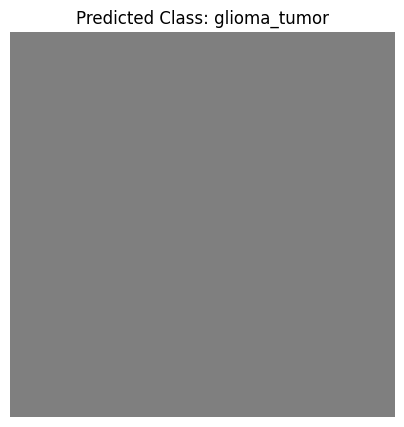

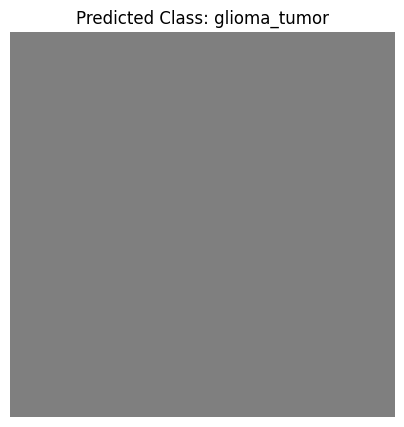

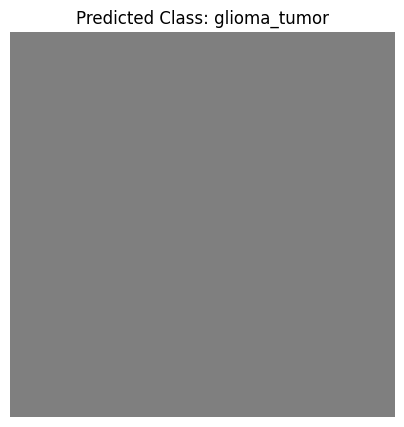

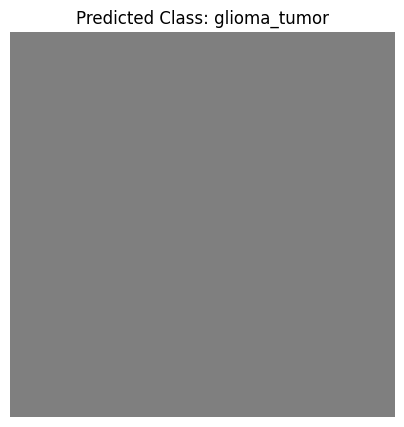

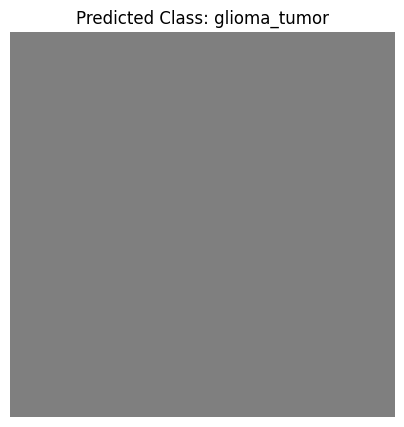

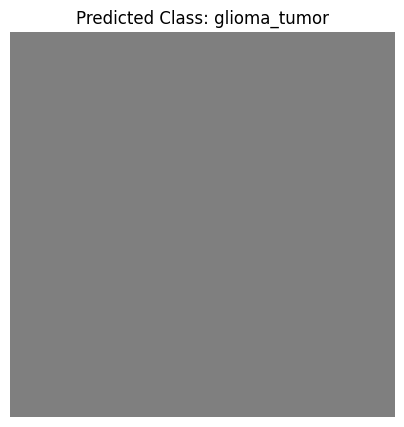

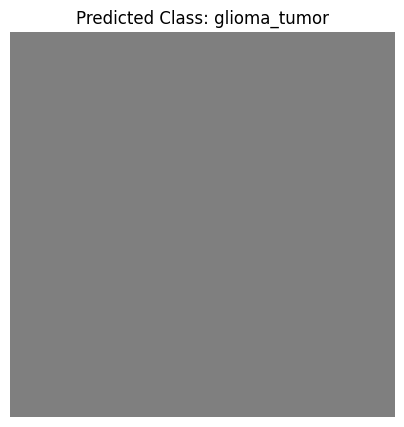

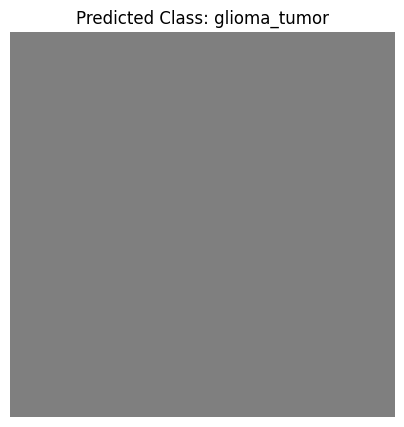

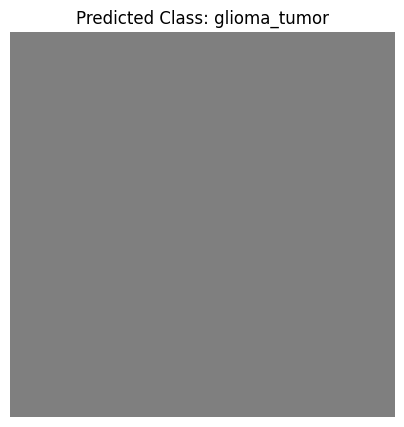

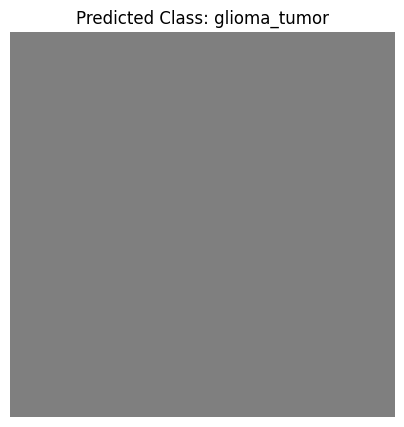

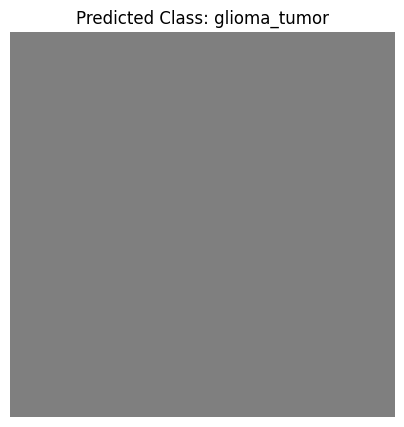

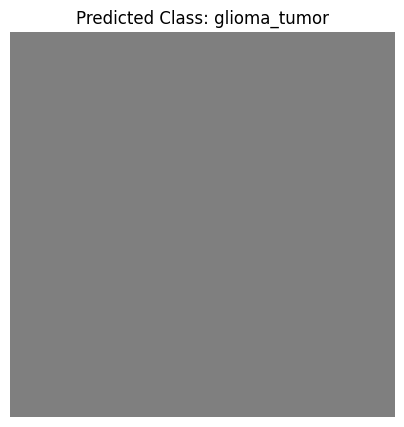

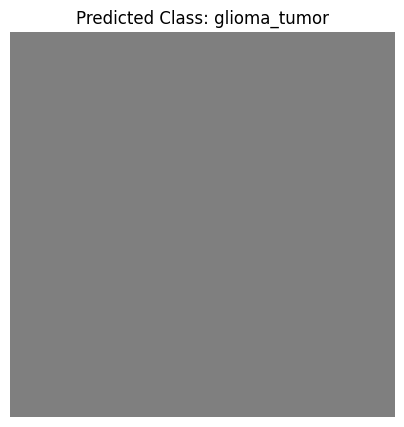

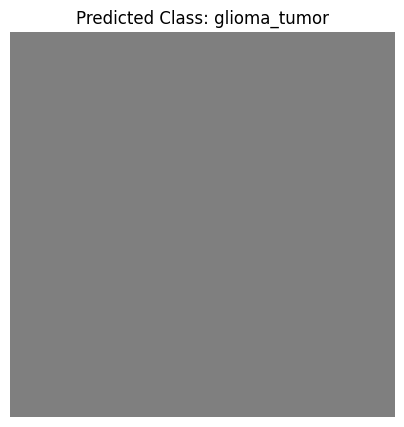

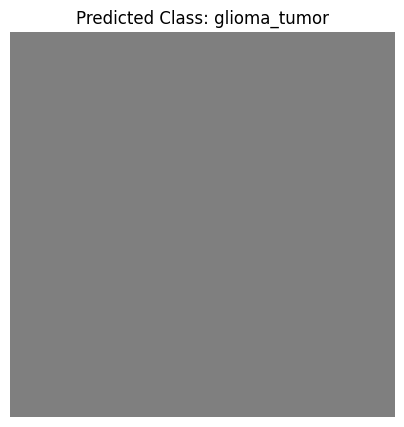

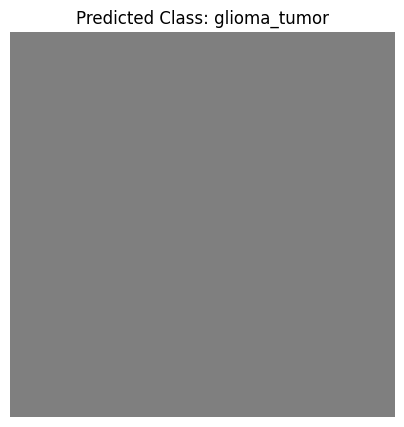

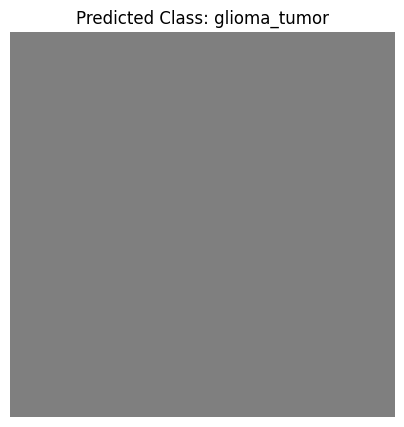

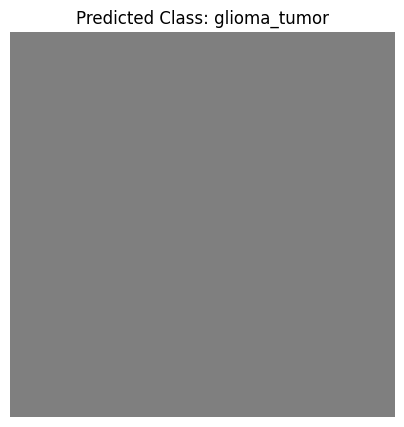

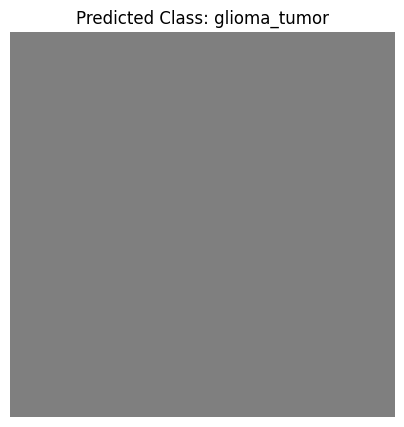

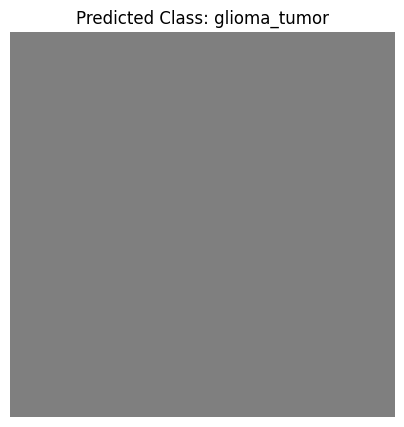

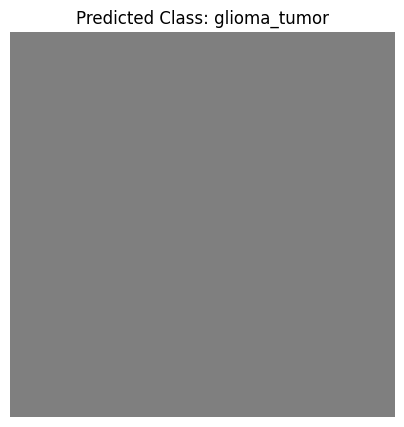

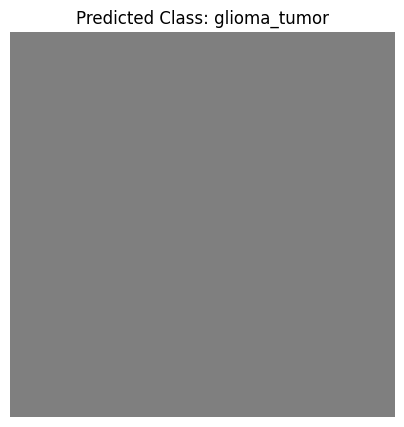

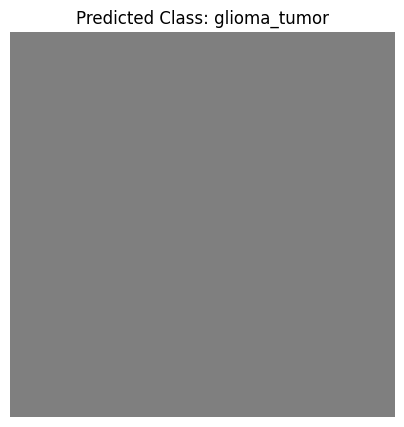

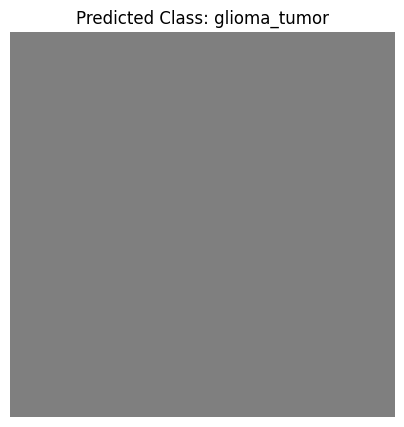

1/1 [==============================] - 0s 41ms/step


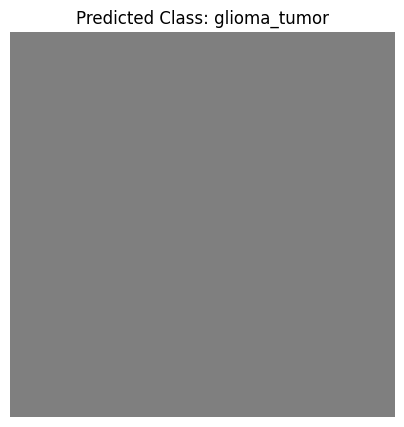

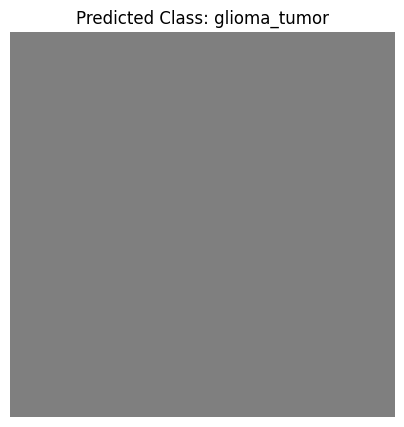

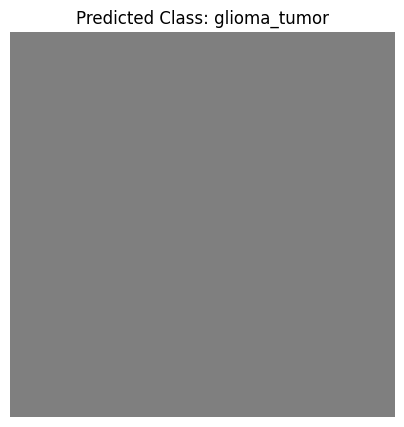

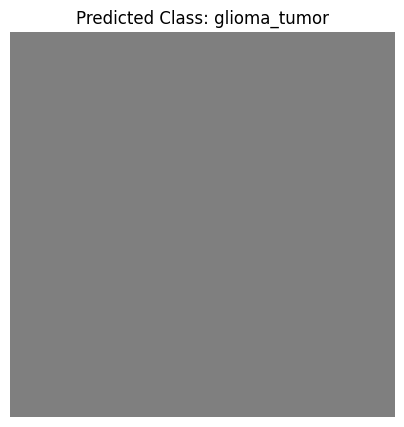

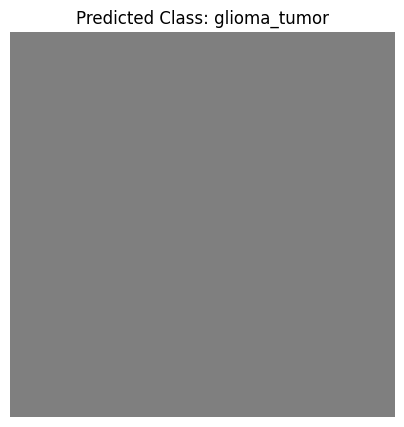

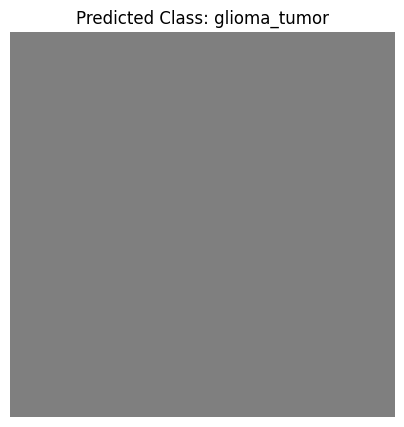

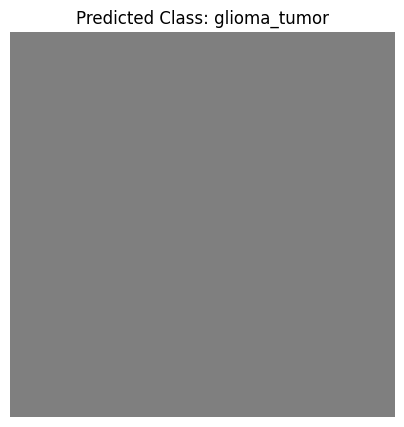

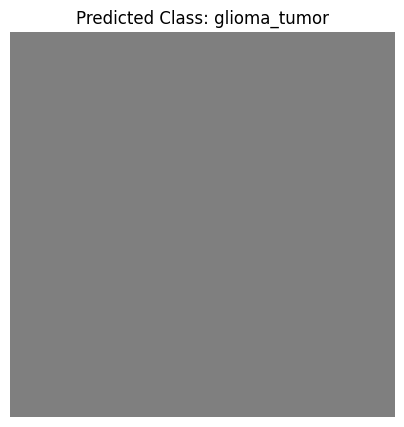

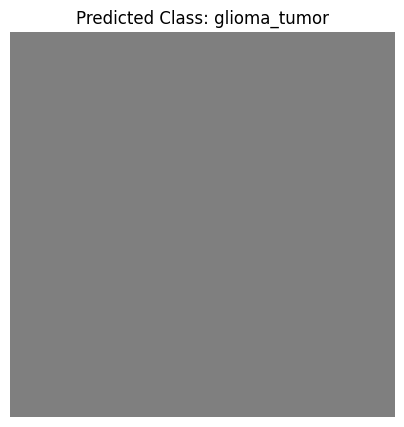

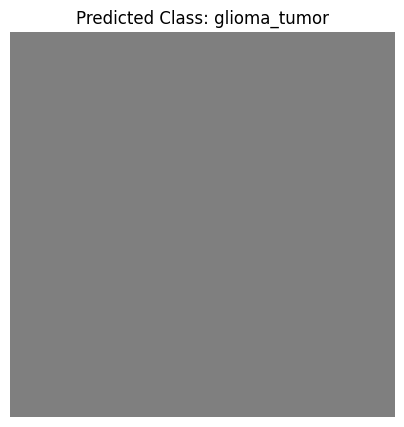

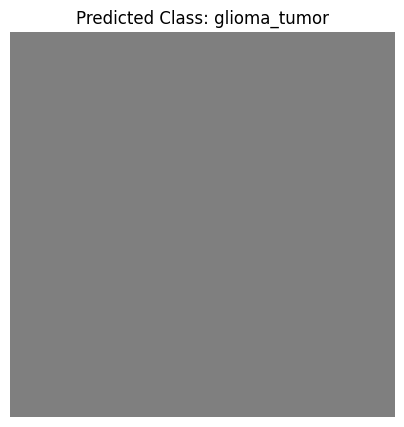

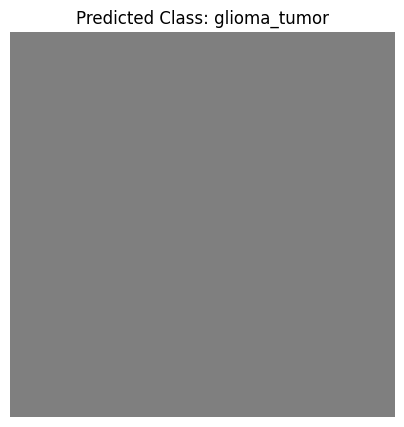

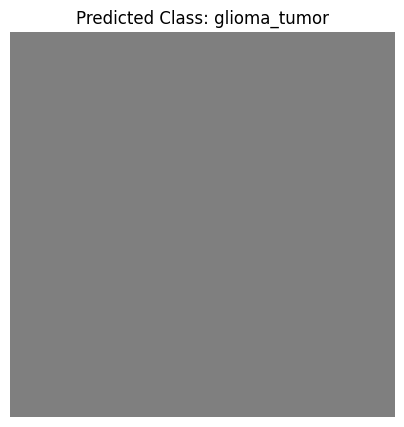

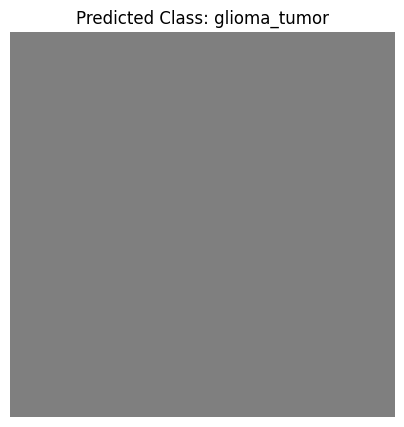

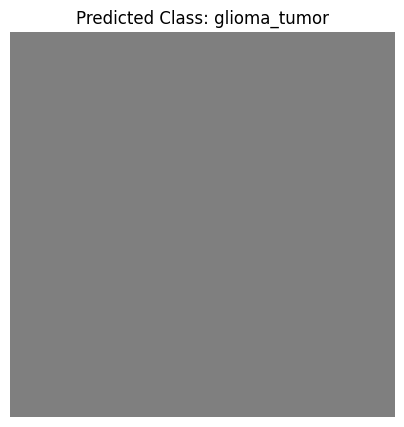

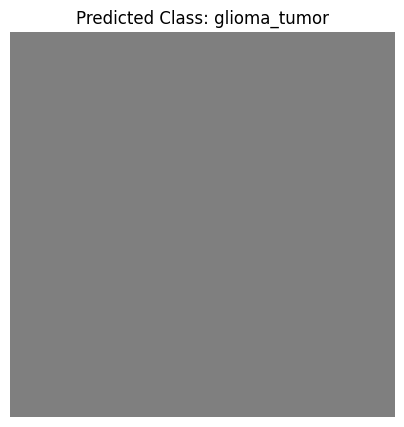

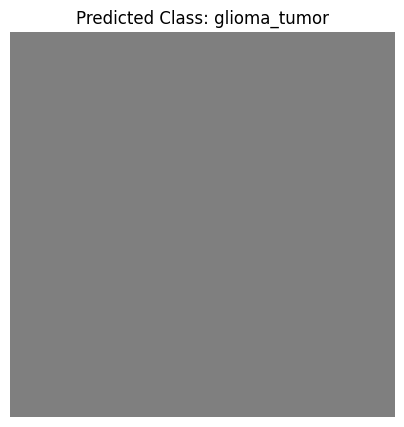

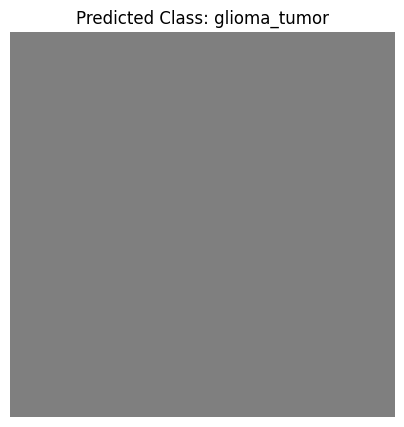

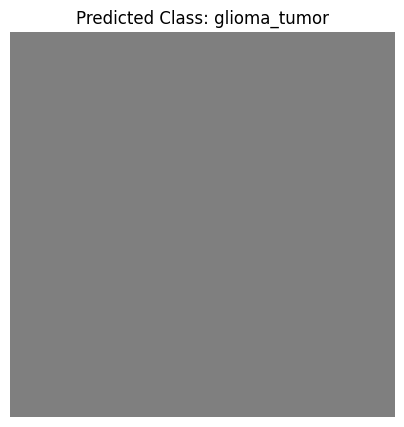

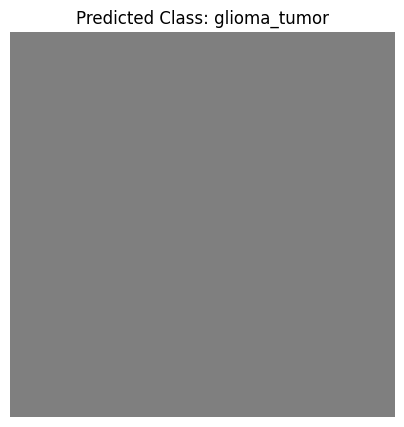

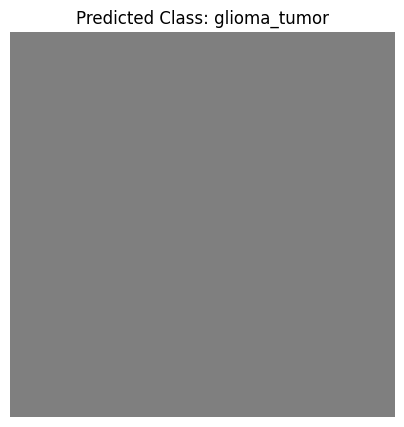

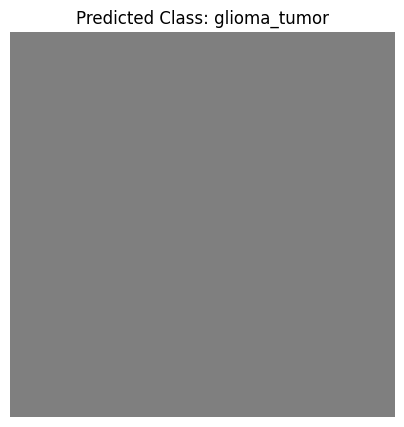

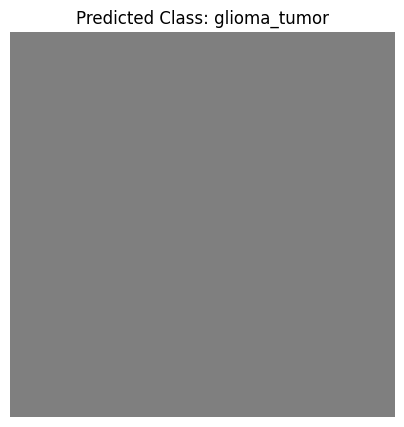

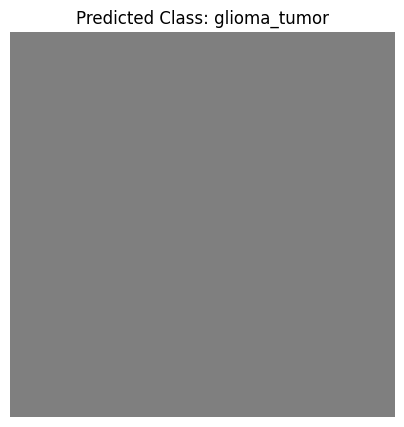

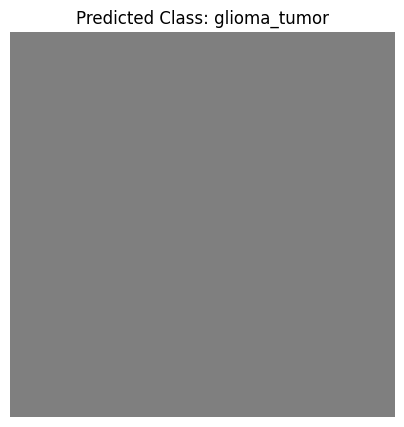

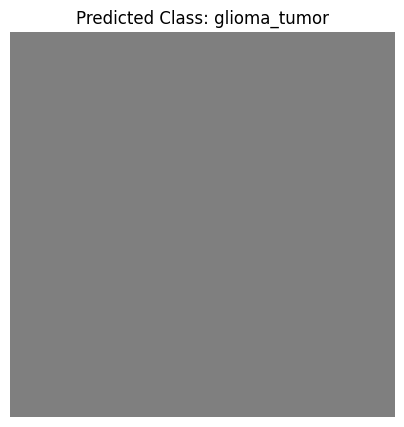

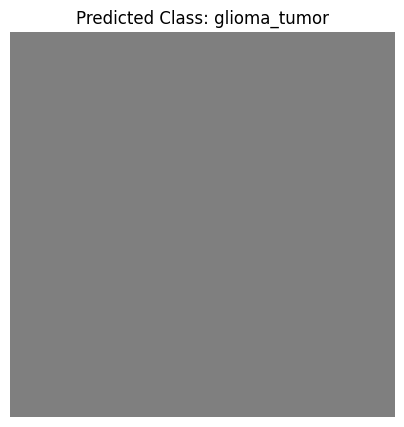

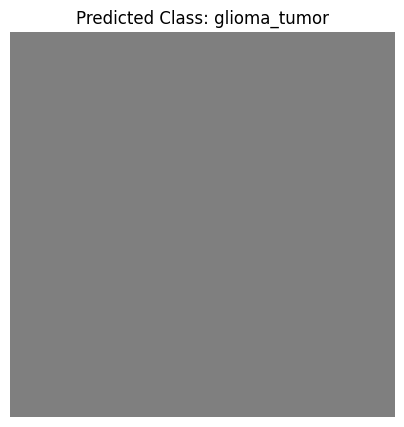

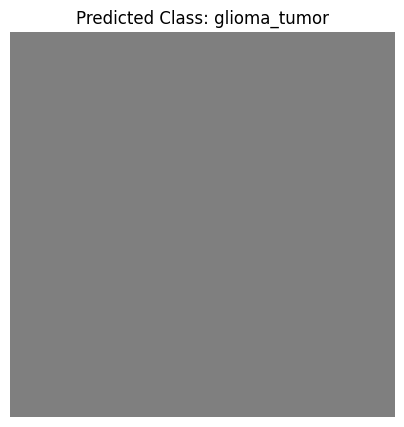

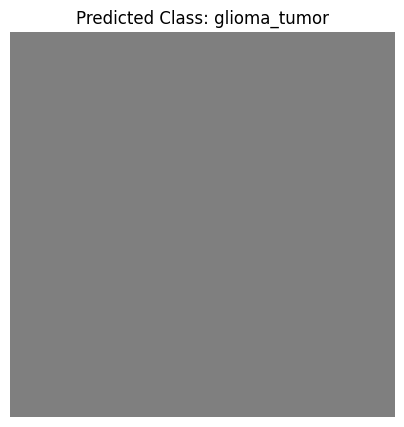

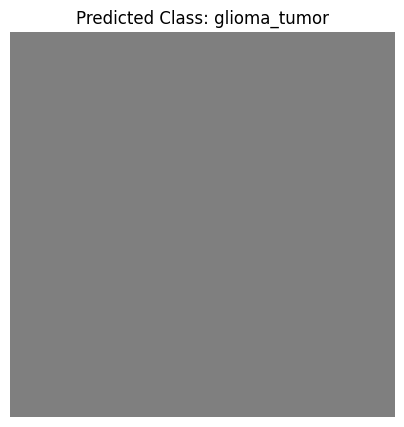

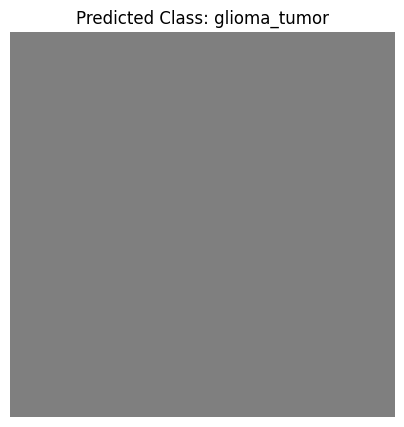

1/1 [==============================] - 0s 37ms/step


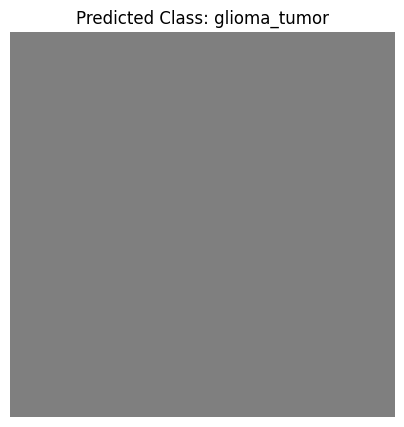

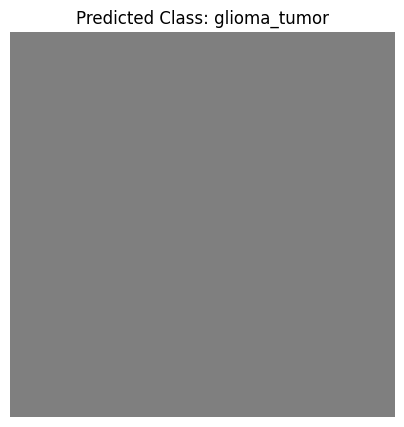

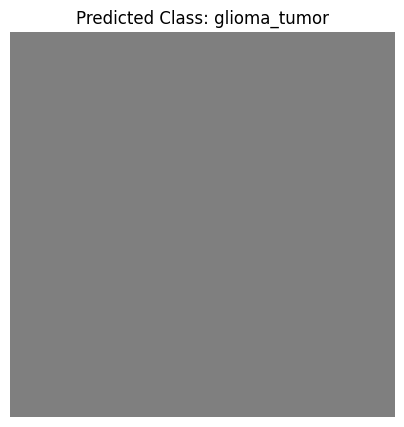

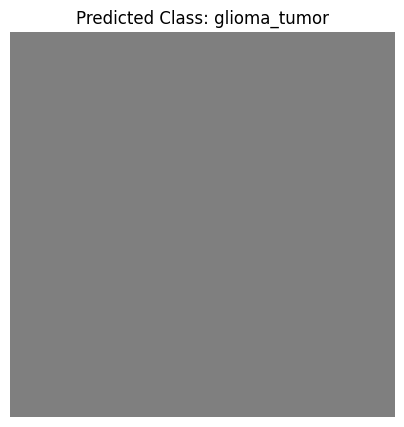

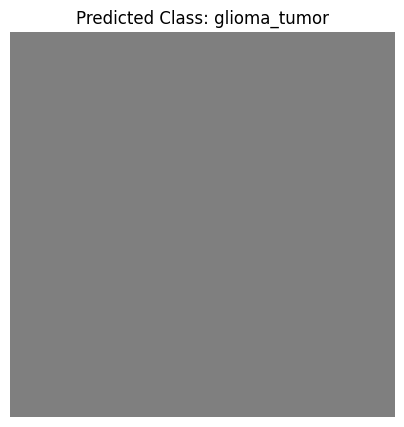

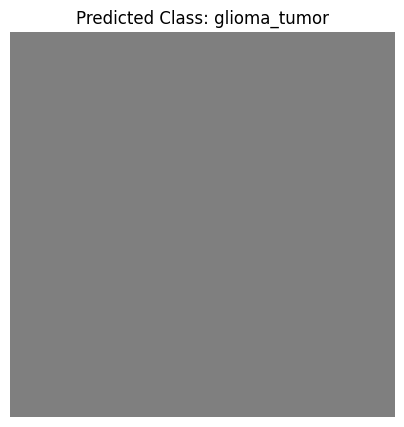

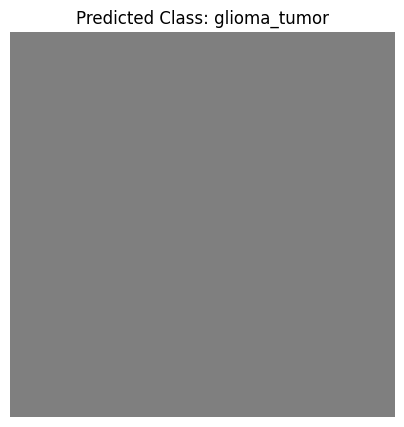

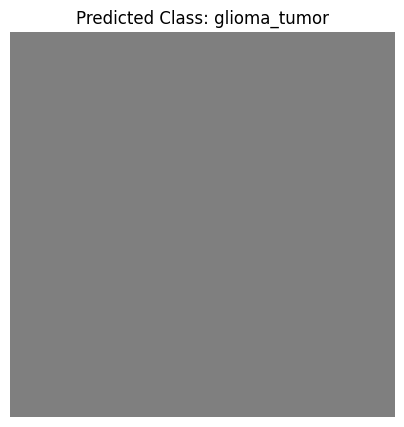

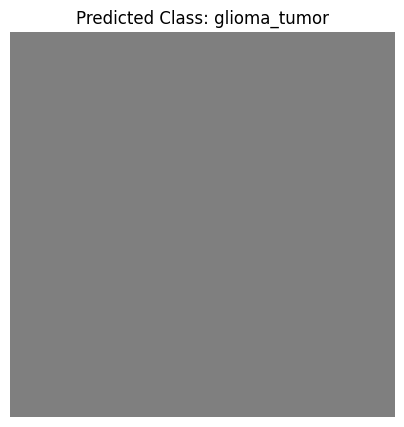

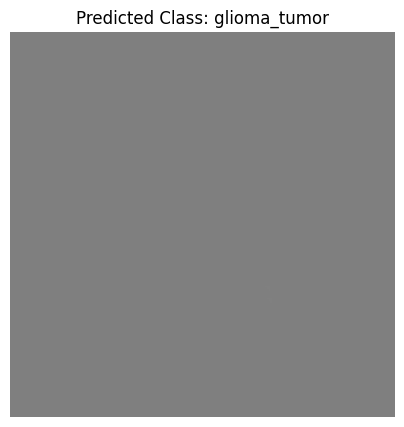

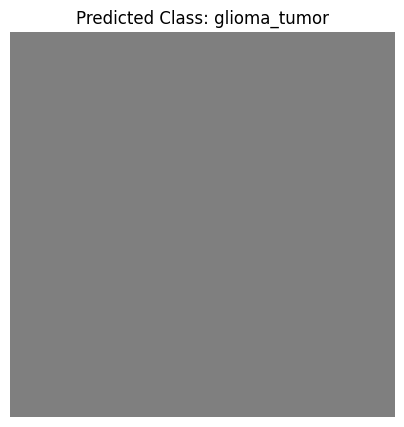

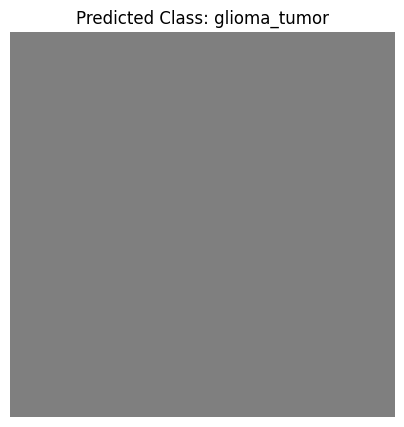

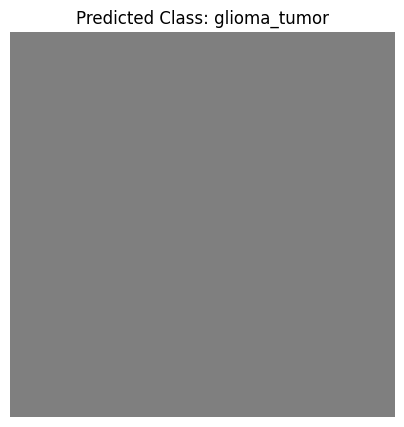

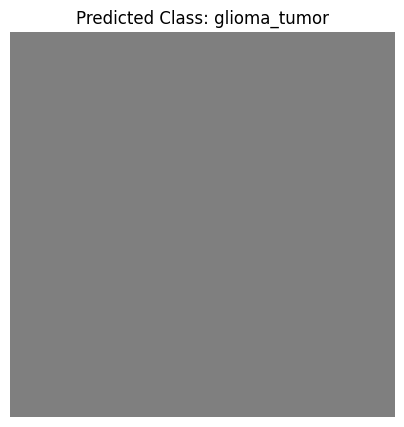

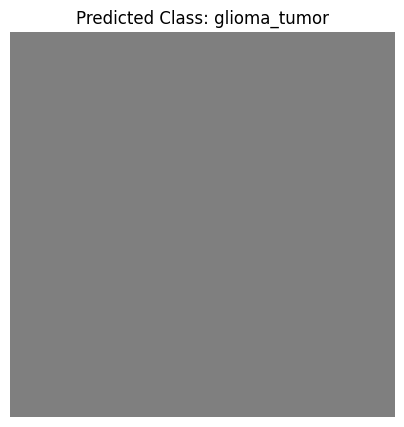

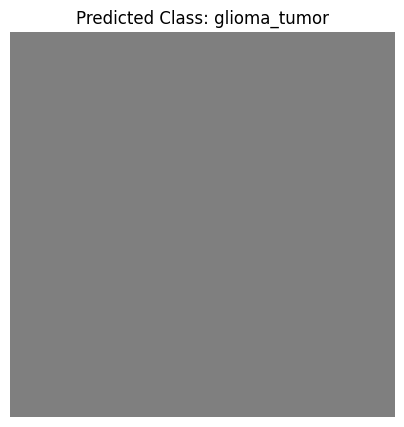

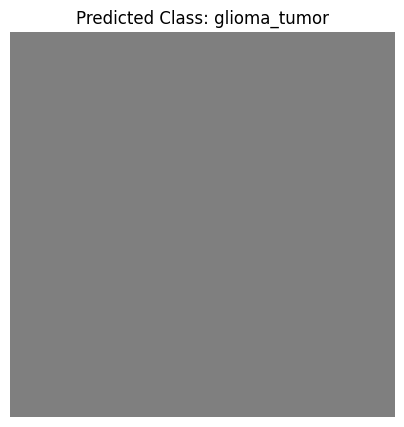

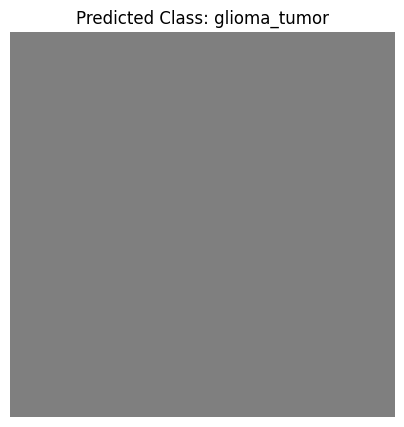

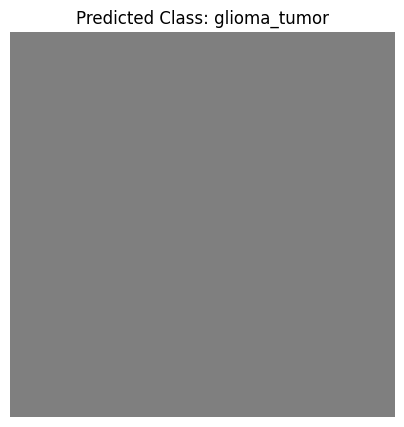

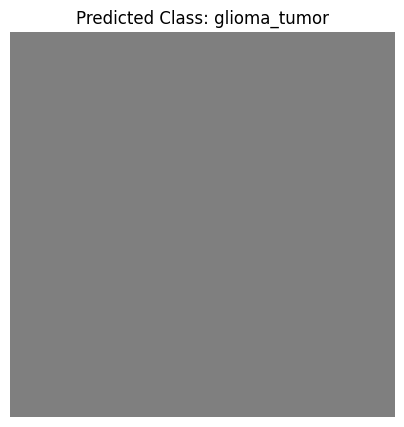

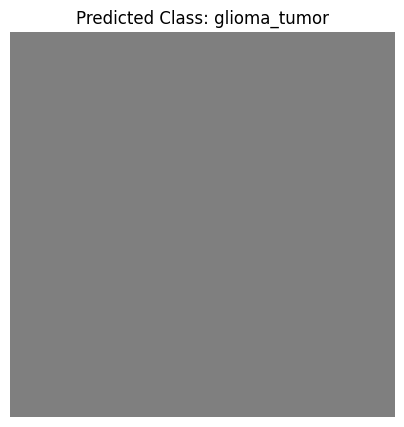

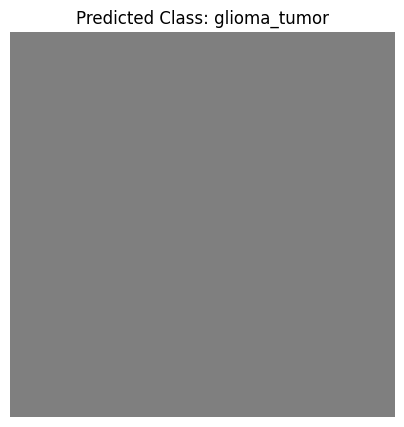

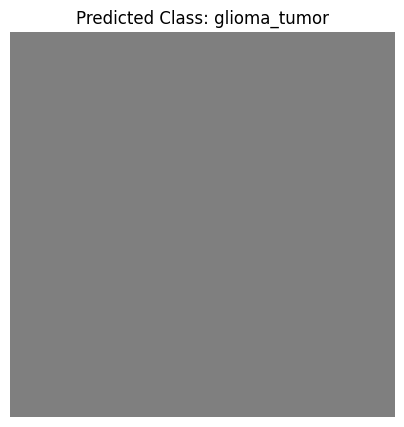

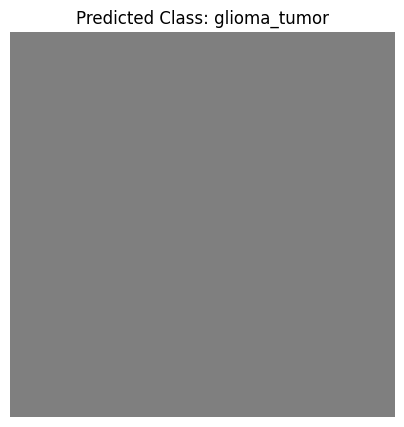

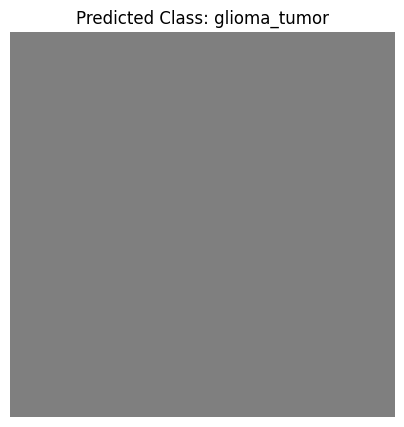

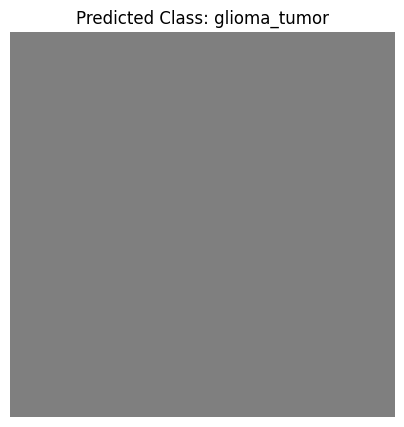

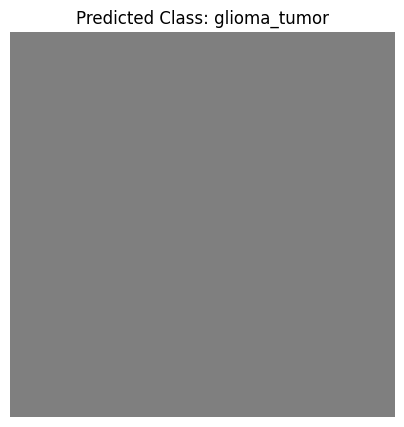

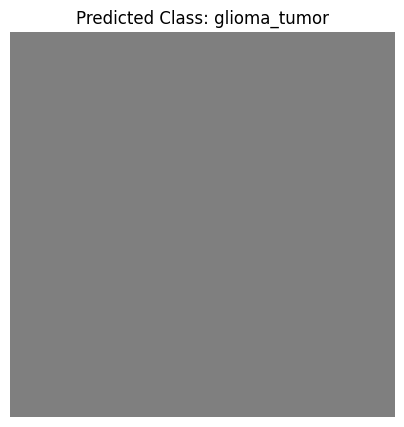

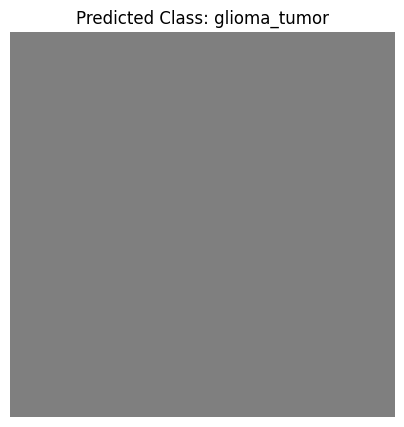

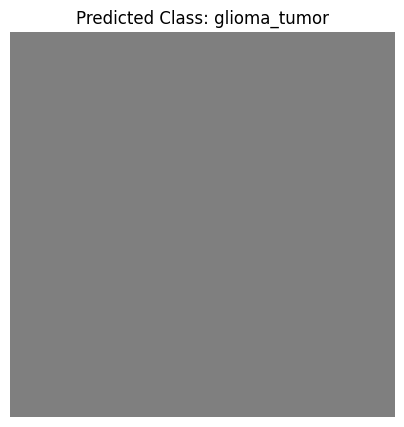

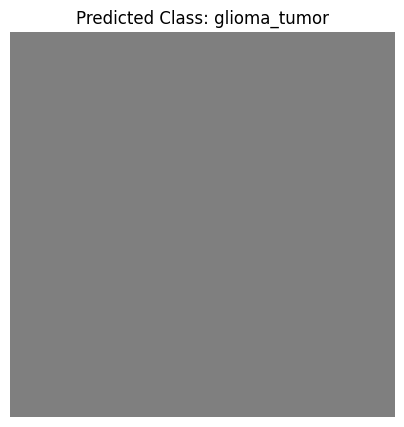

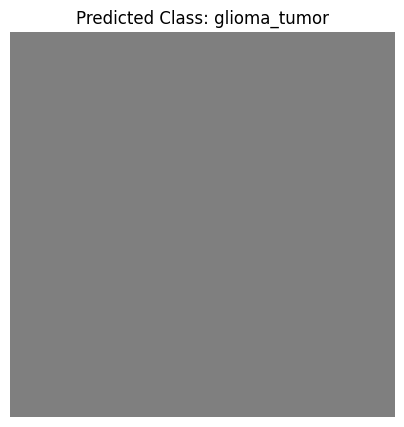

1/1 [==============================] - 0s 56ms/step


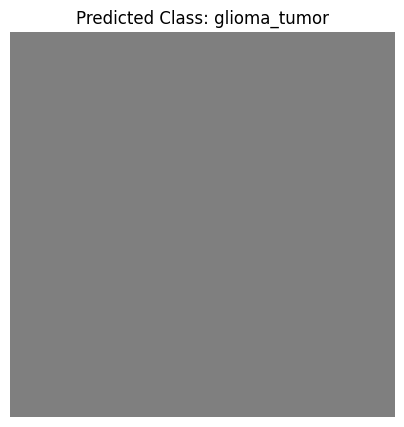

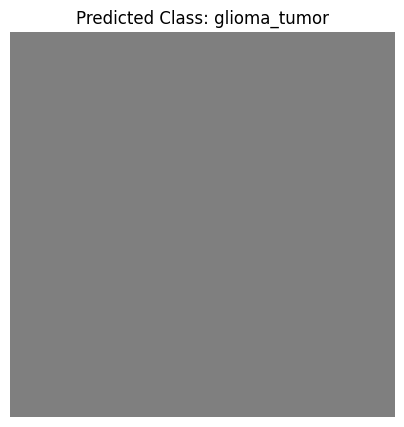

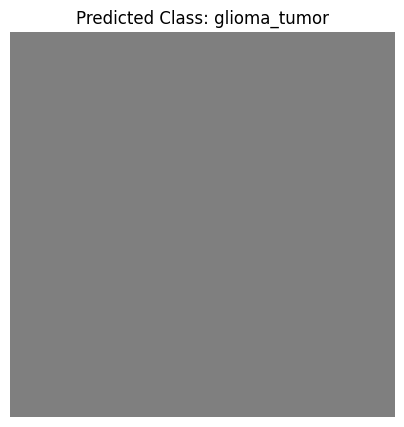

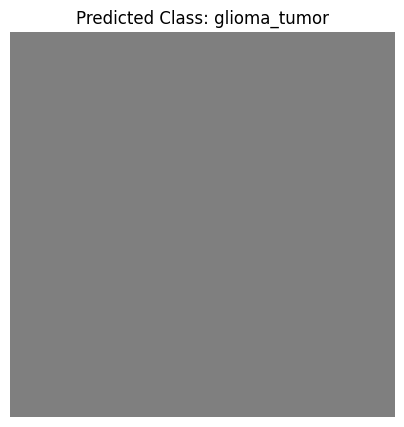

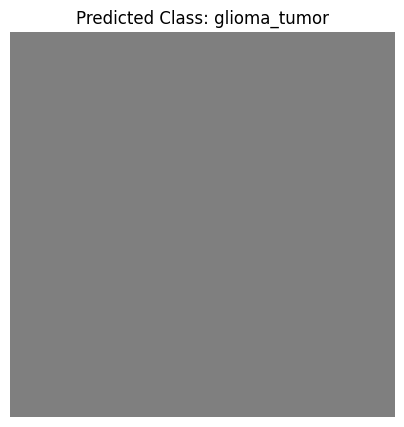

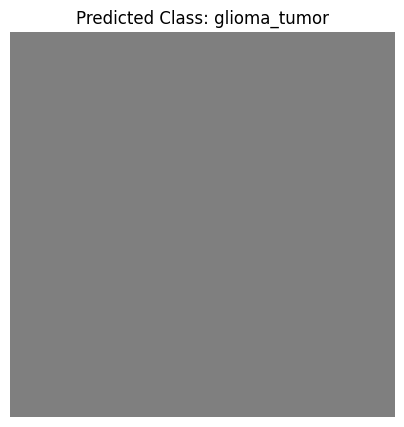

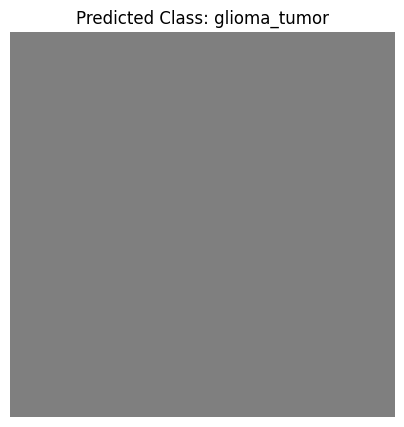

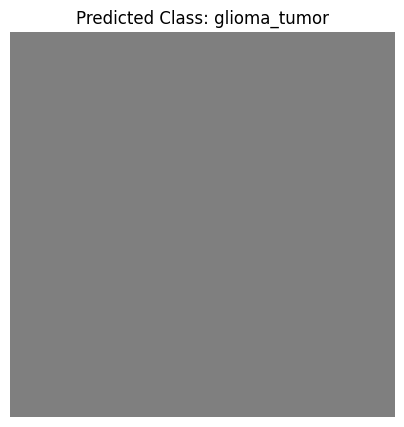

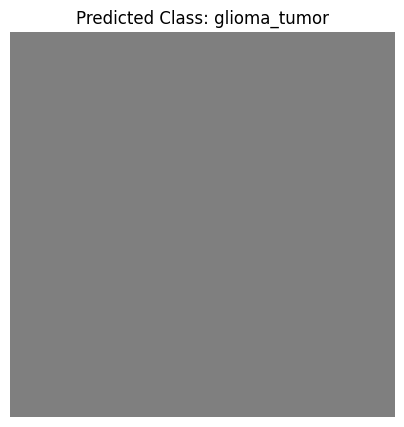

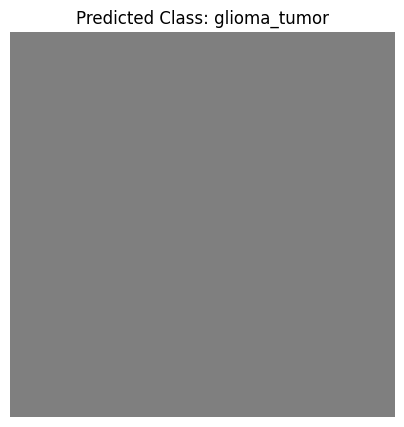

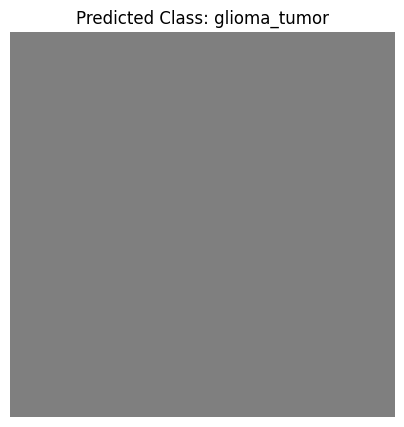

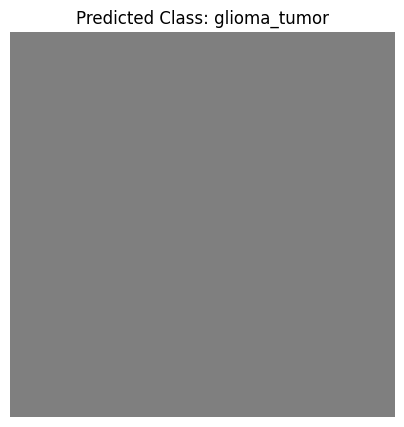

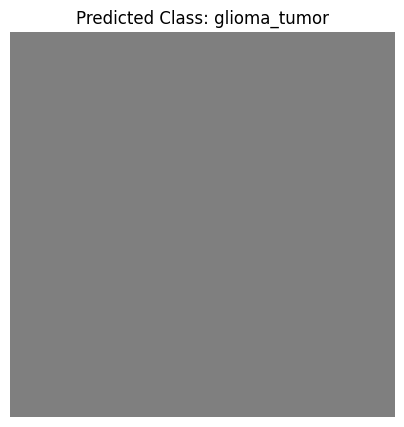

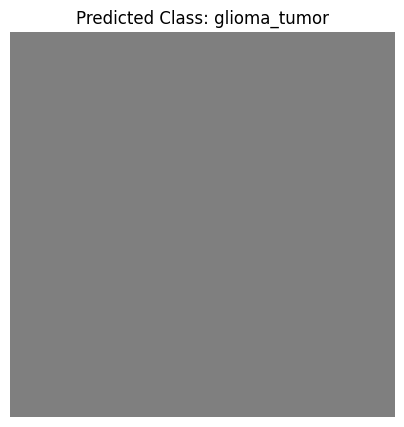

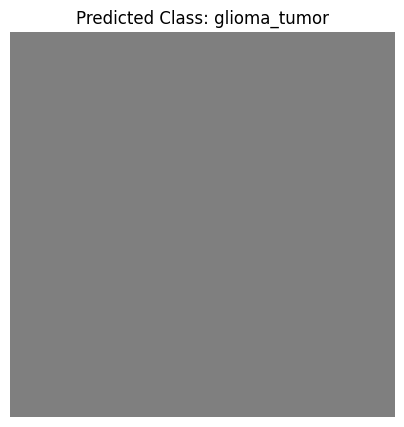

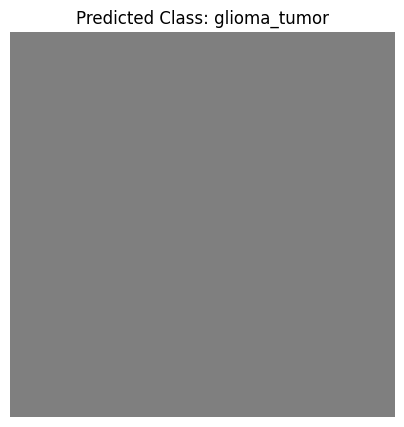

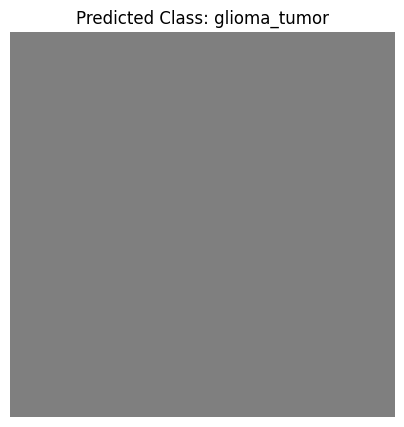

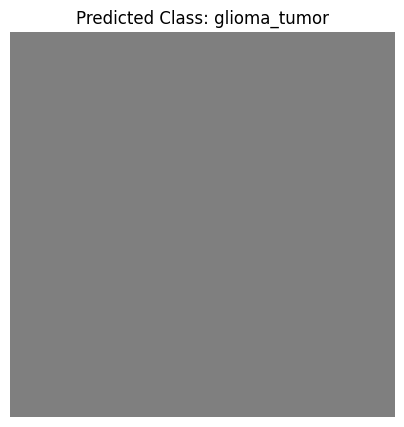

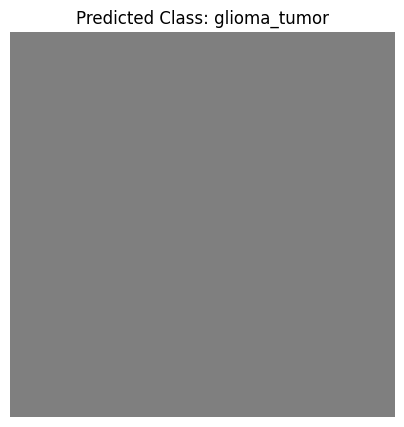

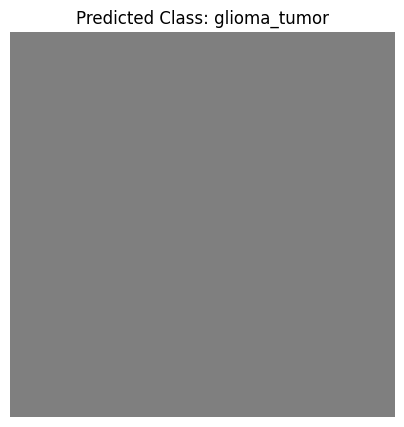

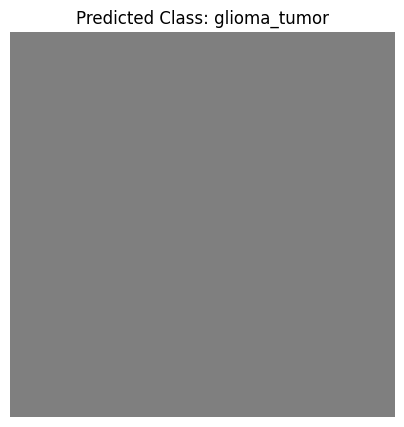

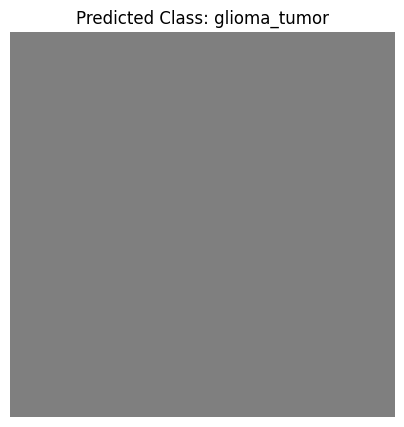

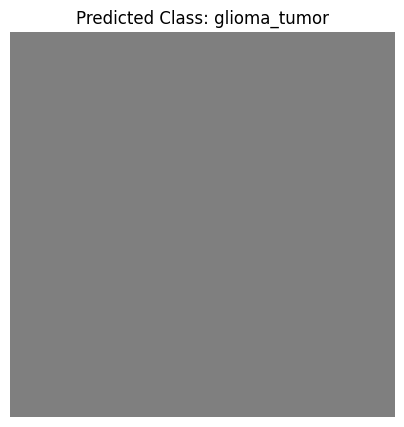

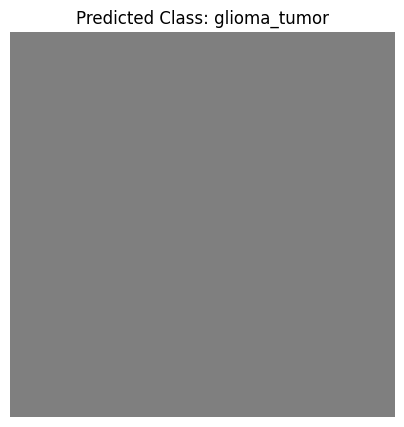

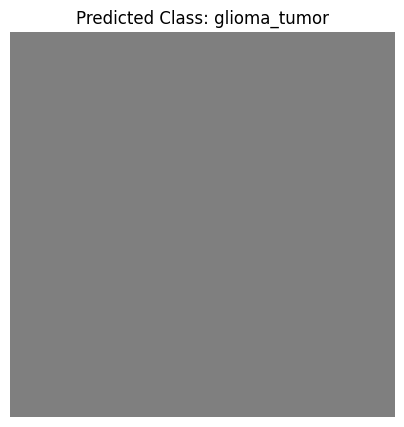

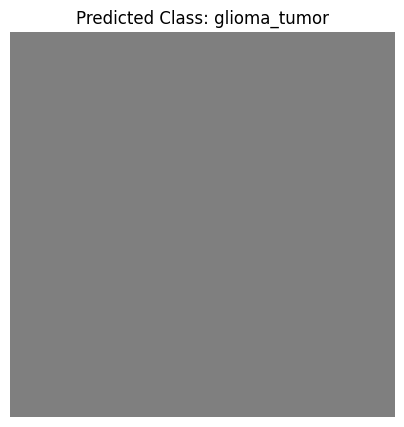

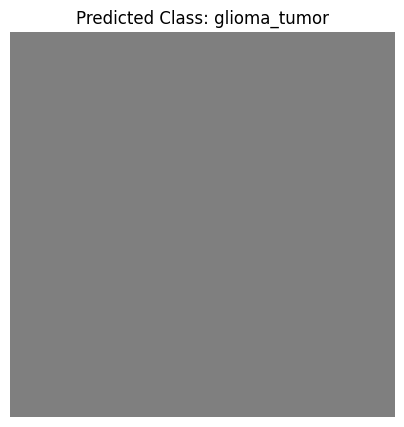

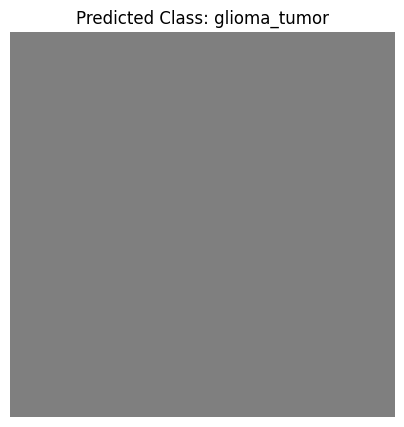

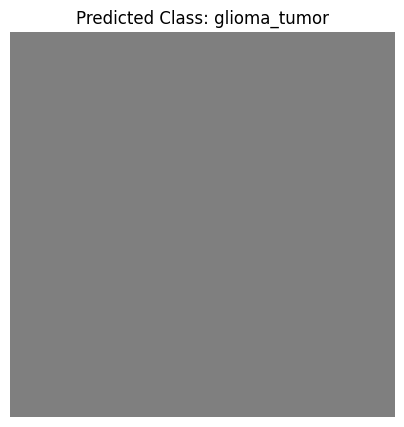

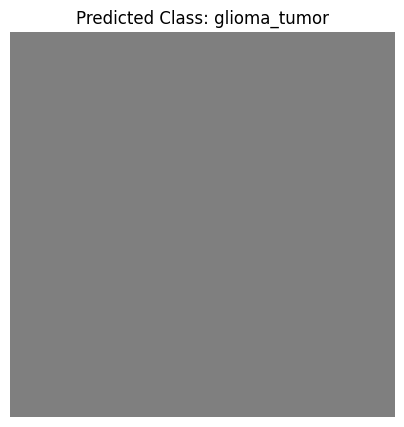

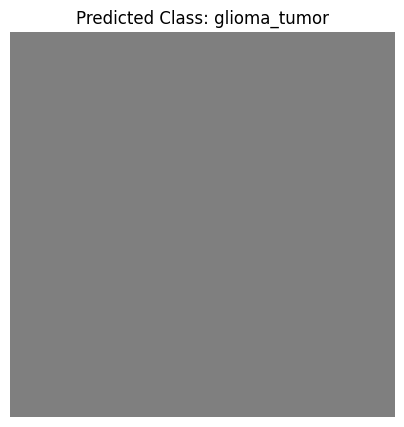

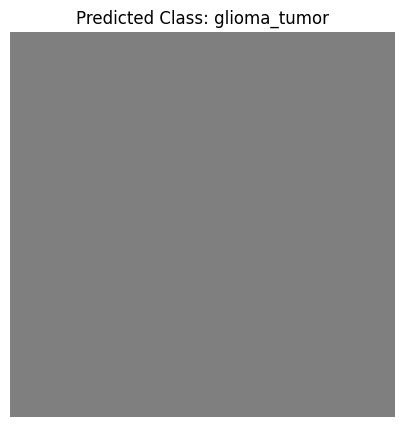

In [2]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.losses import CategoricalCrossentropy
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
num_classes = len(os.listdir(dataset_path))
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
images = []
labels = []
for class_label, class_name in enumerate(os.listdir(dataset_path)):
    class_path = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = preprocess_input(img_array)
        images.append(img_array)
        labels.append(class_label)
images = np.array(images)
labels = tf.keras.utils.to_categorical(labels, num_classes)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
model = Sequential([
    base_model,
    Dense(512, activation='relu'),
    #Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss=CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()
batch_size = 32
epochs = 20
train_datagen = datagen.flow(X_train, y_train, batch_size=batch_size)
val_datagen = datagen.flow(X_val, y_val, batch_size=batch_size)
history = model.fit(
    train_datagen,
    epochs=epochs,
    validation_data=val_datagen,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)
def display_images_with_predictions(model, dataset, class_names, num_images=5):
    for i in range(num_images):
        images, labels = next(dataset)
        predictions = model.predict(images)
        for j in range(images.shape[0]):
            image = (images[j] + 1.0) / 2.0 * 255.0
            image = tf.cast(image, tf.uint8).numpy()
            predicted_class = np.argmax(predictions[j])
            plt.figure(figsize=(5, 5))
            plt.imshow(image)
            plt.title(f"Predicted Class: {class_names[predicted_class]}")
            plt.axis('off')
            plt.show()

class_names = sorted([dir for dir in os.listdir(dataset_path) if not dir.startswith('.')])
display_images_with_predictions(model, val_datagen, class_names)
#I have compiled a model which is showing the predictions but I am having errors as you can see where it is not showing the images

In [31]:
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet', pooling='avg')
base_model.trainable = True

model = Sequential([
    base_model,
    Dense(1024, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()
#I have modified the dropout rate to see if this improves and shows the images.

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense_8 (Dense)             (None, 1024)              1311744   
                                                                 
 dropout_4 (Dropout)         (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 3574853 (13.64 MB)
Trainable params: 3540741 (13.51 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________


Found 3096 files belonging to 4 classes.
Using 619 files for validation.
1/1 [==============================] - 2s 2s/step


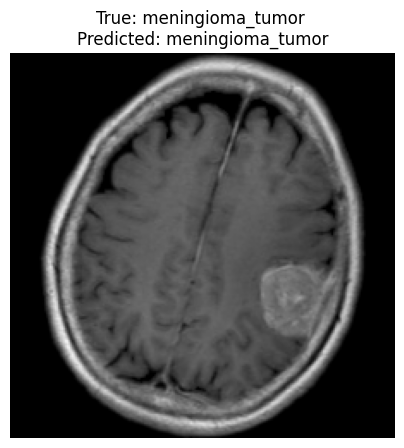

1/1 [==============================] - 0s 33ms/step


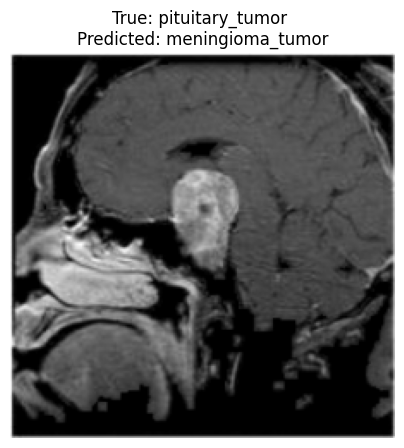

1/1 [==============================] - 0s 23ms/step


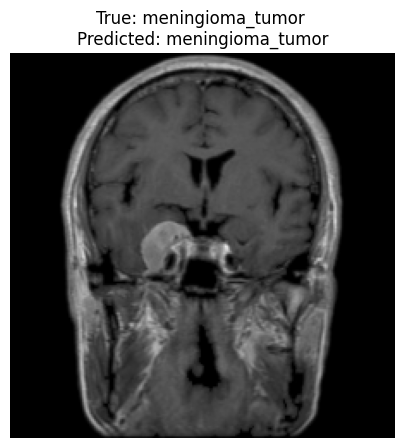

1/1 [==============================] - 0s 24ms/step


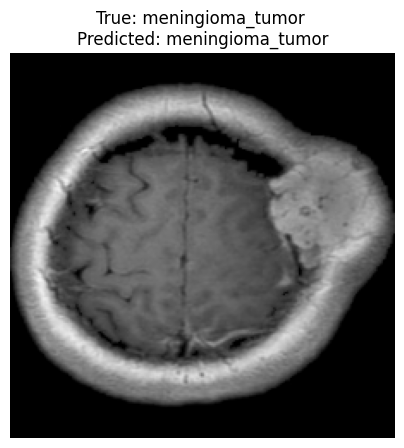

1/1 [==============================] - 0s 43ms/step


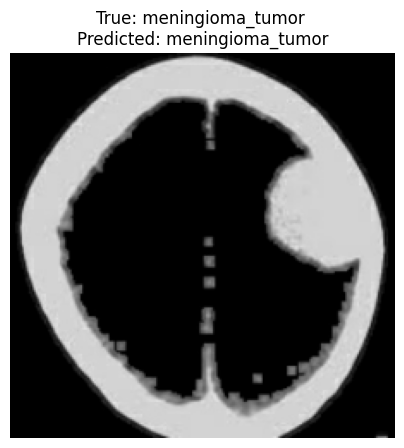

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data'
test_dataset = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(224, 224),
    batch_size=1,
    label_mode='categorical'
)
class_names = test_dataset.class_names
num_images = 5
for i, (image, label) in enumerate(test_dataset.take(num_images)):
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)

    plt.figure(figsize=(5, 5))
    plt.imshow(image[0].numpy().astype(np.uint8))
    plt.title(f"True: {class_names[np.argmax(label[0])]} \nPredicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()
#As you can see , we have been able to get the images to be classified correctly and it also shows the images.

In [ ]:
pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 29.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
adversarial-robustness-toolbox 1.17.0 requires scikit-learn<1.2.0,>=0.22.2, but you have scikit-learn 1.4.0 which is incompatible.


1/1 [==============================] - 2s 2s/step


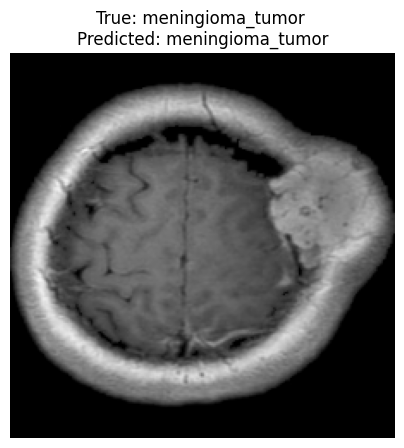

1/1 [==============================] - 0s 22ms/step


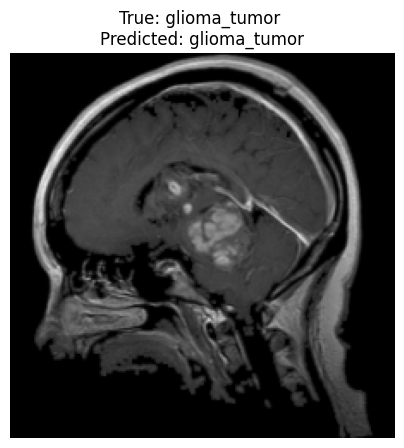

1/1 [==============================] - 0s 22ms/step


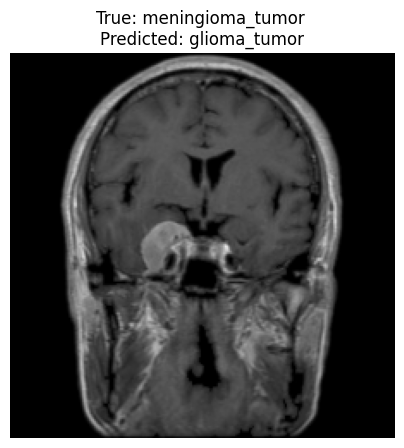

1/1 [==============================] - 0s 23ms/step


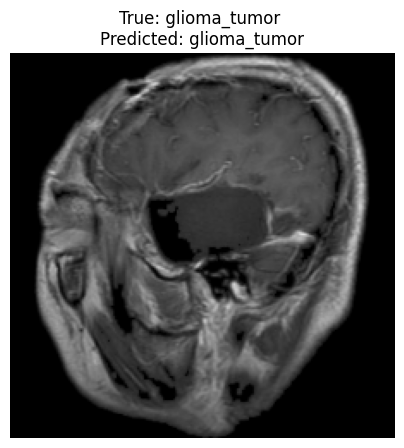

1/1 [==============================] - 0s 23ms/step


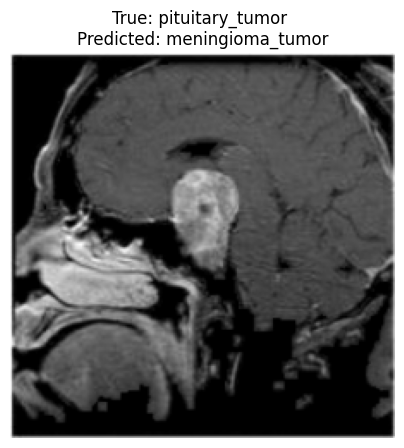

In [ ]:
num_images = 5
for i, (image, label) in enumerate(test_dataset.take(num_images)):
    predictions = model.predict(image)
    predicted_class = np.argmax(predictions)

    plt.figure(figsize=(5, 5))
    plt.imshow(image[0].numpy().astype(np.uint8))
    plt.title(f"True: {class_names[np.argmax(label[0])]} \nPredicted: {class_names[predicted_class]}")
    plt.axis('off')
    plt.show()


In [6]:
pip install adversarial-robustness-toolbox


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.19.2 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
